In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("lung.csv")
print(new_data.shape)

(205, 12601)


# Preprocessing

In [3]:
new_data.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,discrete,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09


In [4]:
df = new_data.iloc[2:,:] # Removes first two tubles
print('Required data set ')
df.head()

Required data set 


,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,AD,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,AD,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [5]:
df.isnull().sum()

class          0
38691_s_at     0
37864_s_at     0
33273_f_at     0
33274_f_at     0
              ..
41422_at       0
39964_at       0
36120_at       0
40571_at       0
36312_at       0
Length: 12601, dtype: int64

In [6]:
df.iloc[:,0].unique()
df[df.columns[0]] = pd.factorize(df[df.columns[0]])[0]
df.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,0,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,0,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,0,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,0,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,0,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [7]:
feature_set = df.iloc[:,1:]
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['38691_s_at ', '37864_s_at ', '33273_f_at ', '33274_f_at ', '33501_r_at ', '33500_i_at ', '33499_s_at ', '41164_at ', '38194_s_at ', '37004_at ', '40808_at ', '41827_f_at ', '34105_f_at ', '41165_g_at ', '769_s_at ', '33699_at ', '31444_s_at ', '33383_f_at ', '37039_at ', '32052_at ', '32805_at ', '34301_r_at ', '33322_i_at ', '35566_f_at ', '35083_at ', '33377_at ', '34342_s_at ', '32252_at ', '36780_at ', '31687_f_at ', '37383_f_at ', '39248_at ', '34485_r_at ', 'AFFX ', '35905_s_at ', '676_g_at ', '35530_f_at ', '39026_r_at ', '41237_at ', 'AFFX-HUMGAPDH/M33197_5_at ', '32648_at ', '39016_r_at ', '35016_at ', '613_at ', '38784_g_at ', '36130_f_at ', '38126_at ', '36785_at ', 'AFFX-HUMGAPDH/M33197_3_at ', '38582_at ', '31525_s_at ', '32275_at ', '39220_at ', '31477_at ', '33261_at ', '700_s_at ', '37021_at ', '201_s_at ', '41446_f_at ', '37897_s_at ', '31586_f_at ', '35474_s_at ', '2027_at ', '39594_f_at ', '41745_at ', '31557_at ', '38095_i_at ', '40544_g_at ', '390

In [8]:
feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.1,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.9,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [9]:
target_feature = df.iloc[:,0]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class , dtype: int64

In [10]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,-0.921957,0.089114,-0.358903,-0.308779,-1.224893,-1.129251,-1.347017,-0.940166,-0.240499,-1.231893,...,0.029278,0.676299,1.202205,-0.259985,-0.322778,-0.446593,0.474743,0.521697,-0.284627,-0.778784
1,-0.566868,0.941621,1.285483,1.300554,0.995647,1.106711,1.323679,1.577288,0.611542,-0.588631,...,0.764167,-0.102548,-0.203140,0.300033,0.667041,0.493047,0.575154,-0.680777,0.170760,0.970673
2,0.210410,1.217338,1.220395,1.091475,0.415313,0.296740,0.648918,0.107713,0.923282,-0.534910,...,0.063735,-0.177118,-0.877780,0.181972,0.369599,0.313565,-0.152354,-0.170210,-0.103233,-0.248916
3,-0.921615,1.284640,1.309472,1.307123,0.868111,0.682642,0.941947,2.188311,1.105149,1.323253,...,0.472345,0.265087,0.445315,0.279944,0.153813,-0.199728,0.107092,1.200160,0.240210,0.929277
4,0.411684,0.972753,1.099487,1.251929,0.743846,0.688795,0.768647,0.721515,1.256965,1.146115,...,0.437278,-1.210363,0.056858,-0.410189,0.670146,0.181904,-0.090923,-0.361868,-0.218031,-0.055947


# Training and Spilting of Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((162, 12600), (41, 12600))

# Selection of features using F Classification 

In [12]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train, 0.7)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :2158.3983511924744 seconds


In [13]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 7399


In [14]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['33631_at ', '38220_at ', '32158_at ', '39613_at ', '34581_s_at ', '1916_s_at ', '32883_at ', '1948_f_at ', '40114_at ', '38462_at ', '1171_s_at ', 'AFFX-BioDn-5_at ', '36808_at ', '36178_at ', '38433_at ', '857_at ', '35193_at ', '34732_at ', '39952_at ', '39736_at ', '37567_at ', '789_at ', '34446_at ', '39998_at ', '33254_at ', '34924_at ', '38465_at ', '31856_at ', '39015_f_at ', '34419_at ', '37660_at ', '39787_at ', '1190_at ', '34006_s_at ', '40463_at ', '37814_g_at ', '40560_at ', '33008_at ', '1419_g_at ', '41236_at ', '37753_at ', '32277_at ', '37950_at ', '32698_at ', '32120_at ', '34145_at ', '32983_at ', '37460_at ', '41587_g_at ', '41665_at ', '36324_at ', '32758_g_at ', '1634_s_at ', '41425_at ', '36828_at ', '33837_at ', '41854_at ', '32891_at ', '40925_at ', '552_at ', '40287_s_at ', '40345_at ', '38475_at ', '35414_s_at ', '39775_at ', '39440_f_at ', '37026_at ', '33765_at ', '35041_at ', '38939_r_at ', '34973_at ', '38959_s_a

In [15]:
columns = feature_set.shape[1]

number_of_features_required = 0.19*columns
print('number_of_features_required : '+str(number_of_features_required))

number_of_features_required = int(number_of_features_required)

print('number_of_features_required in integers: '+str(number_of_features_required))

number_of_features_required : 2394.0
number_of_features_required in integers: 2394


In [16]:
required_features_fc = selected_features_fc[:number_of_features_required]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 2394


In [17]:
X_train1 = X_train[required_features_fc]
X_train1.head()

,33631_at,38220_at,32158_at,39613_at,34581_s_at,1916_s_at,32883_at,1948_f_at,40114_at,38462_at,...,36922_at,32206_at,34337_s_at,962_at,623_s_at,34978_g_at,35465_at,37333_at,31729_at,31811_r_at
116,-0.878043,0.940690,-1.799505,-1.372013,-1.791184,0.743568,-0.916974,-1.359036,-0.483943,-0.526687,...,-1.587707,-0.640250,-1.147803,-1.161415,-1.355729,-1.539582,-1.519110,-1.028753,-1.512213,-1.654779
55,-0.667279,1.064782,-1.027463,-1.278374,-0.910608,-0.249266,-0.382304,-1.156021,-0.284908,-0.444779,...,-1.092069,0.992827,-0.287800,-0.986801,-0.520530,-0.835616,-1.281613,0.689532,-1.063529,-1.081814
26,1.823949,-0.259255,0.498462,0.241354,1.052809,0.185923,0.436378,0.301919,0.141291,-0.569408,...,0.213419,0.095486,1.886839,0.117212,1.111751,0.400155,0.920705,-0.592373,0.613505,0.795821
130,-0.432696,1.087515,-0.705492,0.346251,-1.069645,-0.629753,-0.359907,-0.638647,-0.280362,0.475128,...,-0.389713,-0.413144,0.059253,-0.176440,0.272027,0.529695,-0.501414,0.509142,-0.529534,-0.277954
177,-0.946728,-1.038953,-0.194560,-0.247824,-0.233365,-0.167573,-1.036107,-0.424748,-0.088714,0.294681,...,0.454185,-0.684155,-0.466411,-0.917331,-0.057193,-1.503187,-0.579538,1.455756,-0.705553,-0.507781


In [18]:
X_test1 = X_test[required_features_fc]
X_test1.head()

,33631_at,38220_at,32158_at,39613_at,34581_s_at,1916_s_at,32883_at,1948_f_at,40114_at,38462_at,...,36922_at,32206_at,34337_s_at,962_at,623_s_at,34978_g_at,35465_at,37333_at,31729_at,31811_r_at
18,-0.035817,0.121470,-0.723652,-1.185245,-0.558911,-0.653030,-1.017045,-1.008469,-0.261751,-0.448729,...,-0.530524,-0.724771,2.506257,-0.723002,-0.716228,-1.020228,-0.789431,1.000858,-0.816509,-0.880849
45,-0.306542,0.160679,0.755646,0.266683,0.815587,0.048173,-0.200031,0.494888,0.088798,-0.483134,...,0.511580,0.245507,-0.170527,0.195507,-0.279095,0.692756,0.174359,0.099668,0.590018,0.419011
33,-0.081515,-0.350499,0.758100,0.295082,1.008513,1.471645,0.824752,3.009762,0.057898,-0.725844,...,0.940095,-0.223793,0.030649,0.719538,0.791584,1.022950,1.048047,-0.552722,1.187994,0.960975
37,-0.162109,-0.266867,0.959331,0.786819,1.163281,-0.324634,0.873835,0.403636,0.347572,-0.321916,...,0.387063,1.101518,-0.253794,0.004933,-0.239907,0.772012,1.058984,-0.538343,1.410987,1.151251
109,-0.067390,-0.035158,0.733068,0.952096,1.850130,-0.985274,1.188346,0.602465,0.163738,-0.116938,...,0.627342,-0.463628,1.667706,0.773236,-0.865711,0.320421,1.407938,0.564261,1.372111,1.211647


In [19]:
y_train.shape, y_test.shape

((162,), (41,))

In [20]:
y_train1 = np.array([a+1 for a in y_train]) 
print(y_train1)

y_test1 = np.array([a+1 for a in y_test])

print(y_test1)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [22]:
temp_fscore=0
temp_cm = np.zeros([5,5])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train1, y_train1) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train1)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train1, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test1)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test1, y_test_prediction)))
    
    f_score_knn = f1_score(y_test1, y_test_prediction, average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test1, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test1, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test1, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test1, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test1, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 82.9268
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.3580
Testing accuracy on selected features for 2 neighbors: 82.9268
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 93.8272
Testing accuracy on selected features for 3 neighbors: 82.9268
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 90.1235
Testing accuracy on selected features for 4 neighbors: 82.9268
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 90.7407
Testing accuracy on selected features for 5 neighbors: 85.3659
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 88.8889
Testing accuracy on selected features for 6 neighbors: 85.3659
KNN Classfier for 7 neighbors:
Training accuracy on

In [23]:
cm = confusion_matrix(y_test1, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 3  1  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 3.          1.          0.          0.          0.        ]
 [ 1.94736842  0.          0.          0.          0.05263158]
 [ 1.89473684  0.          0.          1.10526316  0.        ]
 [ 0.94736842  0.          0.          0.          2.05263158]]


Confusion Matrix of KNN Classifier:


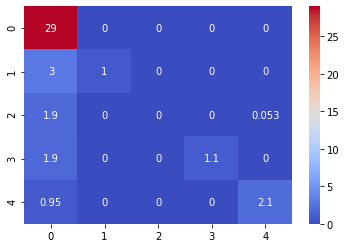

In [24]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [25]:
f_score_knn = f1_score(y_test1, max_y_test_prediction, average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.8536585365853658
Average F-Score is : 0.8087291399229782


# SVM(Support Vector Machine)

In [26]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train1,y_train1)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train1)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train1, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test1)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test1, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 97.5309
Testing accuracy on selected features: 85.3659


In [27]:
cm_svc = confusion_matrix(y_test1, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[29  0  0  0  0]
 [ 3  1  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]


Confusion Matrix of SVM Classifier:


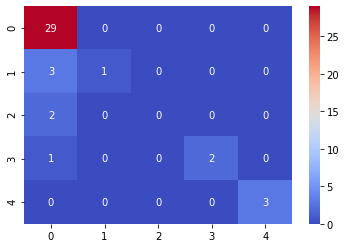

In [28]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [29]:
f_score_svc = f1_score(y_test1, y_test_prediction_svc, average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8536585365853658


# Selection of features using Mutual Information 

In [30]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
  
  combo_d= np.vstack((x,y)).T # It is Combining the data values

  n=len(x)
  n_x=[]
  unique_y=len(set(y))

  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=int(item[1])
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[int(pt[1])]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    
    k=2
    kth_dist_c=distx[k-1]
    dist=[]
    
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    
    n_x_i=len(n_x[int(pt[1])])
    
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx+=1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)
  

In [31]:

X_train_tp=[]
temp=X_train.values.transpose()
for arr in temp:
  X_train_tp.append(arr.astype(float))

In [32]:
mi_start_time = time.time()
 
total_features=len(feature_name)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Target Class and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Target Class and Feature_38691_s_at  :  0.2770028345121772
Mutual Information between Target Class and Feature_37864_s_at  :  0.2702596740466957
Mutual Information between Target Class and Feature_33273_f_at  :  0.16475980812715474
Mutual Information between Target Class and Feature_33274_f_at  :  0.14731305675990972
Mutual Information between Target Class and Feature_33501_r_at  :  0.18853954709879897
Mutual Information between Target Class and Feature_33500_i_at  :  0.16918793664099938
Mutual Information between Target Class and Feature_33499_s_at  :  0.2262947319126555
Mutual Information between Target Class and Feature_41164_at  :  0.17702940078281776
Mutual Information between Target Class and Feature_38194_s_at  :  0.30891013492546676
Mutual Information between Target Class and Feature_37004_at  :  0.29306473499967955
Mutual Information between Target Class and Feature_40808_at  :  0.346930115477732
Mutual Information between Target Class and Feature_41

Mutual Information between Target Class and Feature_37449_i_at  :  0.23528837667684505
Mutual Information between Target Class and Feature_31697_s_at  :  0.19268575972220003
Mutual Information between Target Class and Feature_36617_at  :  0.046707517891054165
Mutual Information between Target Class and Feature_37421_f_at  :  0.1396798742532615
Mutual Information between Target Class and Feature_33702_f_at  :  0.29248825589791777
Mutual Information between Target Class and Feature_273_g_at  :  0.23438313724503065
Mutual Information between Target Class and Feature_31719_at  :  0.33708893961405856
Mutual Information between Target Class and Feature_1612_s_at  :  0.1384465045316535
Mutual Information between Target Class and Feature_31623_f_at  :  0.22716792610546077
Mutual Information between Target Class and Feature_33396_at  :  0.3117374181122491
Mutual Information between Target Class and Feature_31505_at  :  0.08968176540822438
Mutual Information between Target Class and Feature_3230

Mutual Information between Target Class and Feature_40649_at  :  0.2941317963782679
Mutual Information between Target Class and Feature_34643_at  :  0.05737635746742518
Mutual Information between Target Class and Feature_36938_at  :  0.1674899857077364
Mutual Information between Target Class and Feature_37448_s_at  :  0.2959590222808162
Mutual Information between Target Class and Feature_35194_at  :  0.2916515112098759
Mutual Information between Target Class and Feature_40201_at  :  0.35088591318754486
Mutual Information between Target Class and Feature_911_s_at  :  0.2572606832724995
Mutual Information between Target Class and Feature_2094_s_at  :  0.03249907006684735
Mutual Information between Target Class and Feature_40003_at  :  0.3127569751079869
Mutual Information between Target Class and Feature_41206_r_at  :  0.1289447487808093
Mutual Information between Target Class and Feature_31956_f_at  :  0.2622062184003101
Mutual Information between Target Class and Feature_32395_r_at  : 

Mutual Information between Target Class and Feature_38429_at  :  0.1487071814832791
Mutual Information between Target Class and Feature_37473_at  :  0.17189589835858982
Mutual Information between Target Class and Feature_36773_f_at  :  0.3359342055536624
Mutual Information between Target Class and Feature_34235_at  :  0.23458787264122383
Mutual Information between Target Class and Feature_1005_at  :  0.15368171085812515
Mutual Information between Target Class and Feature_36122_at  :  0.05055686704094779
Mutual Information between Target Class and Feature_38751_i_at  :  0.10594270623194427
Mutual Information between Target Class and Feature_40081_at  :  0.2308629539817397
Mutual Information between Target Class and Feature_34842_at  :  0.34612044907173733
Mutual Information between Target Class and Feature_35276_at  :  0.28892466857423194
Mutual Information between Target Class and Feature_36638_at  :  0.1542516300973187
Mutual Information between Target Class and Feature_36203_at  :  0

Mutual Information between Target Class and Feature_32563_at  :  0.2601287079051664
Mutual Information between Target Class and Feature_40324_r_at  :  0.09982599840959658
Mutual Information between Target Class and Feature_41753_at  :  0.046300773715290615
Mutual Information between Target Class and Feature_41424_at  :  0.4019422655400203
Mutual Information between Target Class and Feature_36284_at  :  0.06560207178611194
Mutual Information between Target Class and Feature_279_at  :  0.21701417817993465
Mutual Information between Target Class and Feature_36933_at  :  0.14309519298618673
Mutual Information between Target Class and Feature_33998_at  :  0.14058468850203512
Mutual Information between Target Class and Feature_266_s_at  :  0.26922264224368153
Mutual Information between Target Class and Feature_36634_at  :  0.14764553966875207
Mutual Information between Target Class and Feature_31596_f_at  :  0.1388682494128951
Mutual Information between Target Class and Feature_1980_s_at  : 

Mutual Information between Target Class and Feature_32316_s_at  :  0.08291691545663088
Mutual Information between Target Class and Feature_31546_at  :  0.09134237942406004
Mutual Information between Target Class and Feature_37311_at  :  0.12136376608069932
Mutual Information between Target Class and Feature_40496_at  :  0.28334949943007764
Mutual Information between Target Class and Feature_37061_at  :  0.18095512438574057
Mutual Information between Target Class and Feature_32773_at  :  0.18190177954173556
Mutual Information between Target Class and Feature_37324_at  :  0.2967638130770535
Mutual Information between Target Class and Feature_40898_at  :  0.11778537049822826
Mutual Information between Target Class and Feature_34407_at  :  0.3539594791359244
Mutual Information between Target Class and Feature_36138_at  :  0.13659354593505083
Mutual Information between Target Class and Feature_162_at  :  0.387184856434627
Mutual Information between Target Class and Feature_32035_at  :  0.19

Mutual Information between Target Class and Feature_40766_at  :  0.19488843659682756
Mutual Information between Target Class and Feature_38722_at  :  0.08951465773518809
Mutual Information between Target Class and Feature_37168_at  :  0.2779536746737497
Mutual Information between Target Class and Feature_36786_at  :  0.021758825603823168
Mutual Information between Target Class and Feature_35745_f_at  :  0.3058177097044021
Mutual Information between Target Class and Feature_36152_at  :  0.4543752632276872
Mutual Information between Target Class and Feature_2079_s_at  :  0.10118184034511744
Mutual Information between Target Class and Feature_33679_f_at  :  0.04732133807744591
Mutual Information between Target Class and Feature_37403_at  :  0.2831591552604278
Mutual Information between Target Class and Feature_33143_s_at  :  0.3287101168379678
Mutual Information between Target Class and Feature_41629_at  :  0.24072913669933424
Mutual Information between Target Class and Feature_38779_r_at

Mutual Information between Target Class and Feature_31791_at  :  0.26129071636958495
Mutual Information between Target Class and Feature_38385_at  :  0.11544247665555168
Mutual Information between Target Class and Feature_40635_at  :  0.017783737804263757
Mutual Information between Target Class and Feature_296_at  :  0.04109398779003181
Mutual Information between Target Class and Feature_36986_at  :  0.059368739734198706
Mutual Information between Target Class and Feature_41185_f_at  :  0.1290601144657298
Mutual Information between Target Class and Feature_40125_at  :  0.13484903197779174
Mutual Information between Target Class and Feature_33908_at  :  0.19868358906042557
Mutual Information between Target Class and Feature_41531_at  :  0.2460722142430413
Mutual Information between Target Class and Feature_40825_at  :  0.33277287752539997
Mutual Information between Target Class and Feature_335_r_at  :  0.030349005787668273
Mutual Information between Target Class and Feature_38299_at  : 

Mutual Information between Target Class and Feature_41484_r_at  :  0.1622563860199078
Mutual Information between Target Class and Feature_36452_at  :  0.24766918301364996
Mutual Information between Target Class and Feature_33399_at  :  0.14863511918199182
Mutual Information between Target Class and Feature_33845_at  :  0.04685758738819579
Mutual Information between Target Class and Feature_38121_at  :  0.09876179671636398
Mutual Information between Target Class and Feature_40790_at  :  0.09618567297063615
Mutual Information between Target Class and Feature_503_at  :  0.011268202288039155
Mutual Information between Target Class and Feature_41416_at  :  0.22776504652502175
Mutual Information between Target Class and Feature_1007_s_at  :  0.21318514578107864
Mutual Information between Target Class and Feature_39003_at  :  0.19137224370467898
Mutual Information between Target Class and Feature_41724_at  :  0.04833643392540952
Mutual Information between Target Class and Feature_40134_at  : 

Mutual Information between Target Class and Feature_36614_at  :  0.2175373646515038
Mutual Information between Target Class and Feature_39331_at  :  0.12344192571578722
Mutual Information between Target Class and Feature_37065_f_at  :  0.05199840054925058
Mutual Information between Target Class and Feature_38647_at  :  0.07211098957991505
Mutual Information between Target Class and Feature_32192_g_at  :  0.2677448837410515
Mutual Information between Target Class and Feature_32140_at  :  0.13316218239930327
Mutual Information between Target Class and Feature_40828_at  :  0.213847704947604
Mutual Information between Target Class and Feature_924_s_at  :  0.23437836559265435
Mutual Information between Target Class and Feature_35363_at  :  0.23628381809878923
Mutual Information between Target Class and Feature_39561_at  :  0.391356726804493
Mutual Information between Target Class and Feature_35852_at  :  0.24906555145510692
Mutual Information between Target Class and Feature_317_at  :  0.00

Mutual Information between Target Class and Feature_39088_at  :  0.04111613032479959
Mutual Information between Target Class and Feature_38484_at  :  0.41950252372422125
Mutual Information between Target Class and Feature_40867_at  :  0.2541853374073001
Mutual Information between Target Class and Feature_34796_at  :  0.2972182002697078
Mutual Information between Target Class and Feature_34278_at  :  0.06623638543005106
Mutual Information between Target Class and Feature_31745_at  :  0.14502429909762776
Mutual Information between Target Class and Feature_32080_at  :  0.002955895557998056
Mutual Information between Target Class and Feature_306_s_at  :  0.05796829687050062
Mutual Information between Target Class and Feature_35485_at  :  0.04684953198287738
Mutual Information between Target Class and Feature_2049_s_at  :  0.09331925444451969
Mutual Information between Target Class and Feature_35262_at  :  0.12526339097818942
Mutual Information between Target Class and Feature_39861_at  :  

Mutual Information between Target Class and Feature_32893_s_at  :  0.30424062052074585
Mutual Information between Target Class and Feature_38681_at  :  0.0346748889039358
Mutual Information between Target Class and Feature_38858_at  :  0.10045251574367185
Mutual Information between Target Class and Feature_37189_at  :  0.1585095334443056
Mutual Information between Target Class and Feature_40163_r_at  :  0.03653407038729977
Mutual Information between Target Class and Feature_35378_at  :  0.07255400345729378
Mutual Information between Target Class and Feature_39856_at  :  0.05513822361864014
Mutual Information between Target Class and Feature_34819_at  :  0.2930433065939217
Mutual Information between Target Class and Feature_697_f_at  :  0.10709506776369124
Mutual Information between Target Class and Feature_41246_at  :  0.09143414021747441
Mutual Information between Target Class and Feature_39033_at  :  0.24402231183330383
Mutual Information between Target Class and Feature_36008_at  : 

Mutual Information between Target Class and Feature_977_s_at  :  0.049436314862663755
Mutual Information between Target Class and Feature_34678_at  :  0.3027539769383971
Mutual Information between Target Class and Feature_33919_at  :  0.1633664089073713
Mutual Information between Target Class and Feature_39436_at  :  0.15081425321697825
Mutual Information between Target Class and Feature_189_s_at  :  0.1769236970986372
Mutual Information between Target Class and Feature_1519_at  :  0.08299824538453474
Mutual Information between Target Class and Feature_38480_s_at  :  0.07329003955438727
Mutual Information between Target Class and Feature_1752_at  :  0.07311681559337535
Mutual Information between Target Class and Feature_40417_at  :  0.16597844209258542
Mutual Information between Target Class and Feature_32845_at  :  0.04338971889169795
Mutual Information between Target Class and Feature_498_at  :  0.11817615998607812
Mutual Information between Target Class and Feature_37040_at  :  0.08

Mutual Information between Target Class and Feature_34397_at  :  0.24261690517159934
Mutual Information between Target Class and Feature_38063_at  :  0.26227334839460364
Mutual Information between Target Class and Feature_607_s_at  :  0.30434642728520417
Mutual Information between Target Class and Feature_38019_at  :  0.198594268817026
Mutual Information between Target Class and Feature_37024_at  :  0.3253576651574388
Mutual Information between Target Class and Feature_38780_at  :  0.10546258089756055
Mutual Information between Target Class and Feature_677_s_at  :  0.2819734832708301
Mutual Information between Target Class and Feature_37028_at  :  0.07589784445194396
Mutual Information between Target Class and Feature_39657_at  :  0.011367250195371202
Mutual Information between Target Class and Feature_37992_s_at  :  0.15086035244958407
Mutual Information between Target Class and Feature_38745_at  :  0.03169656837248305
Mutual Information between Target Class and Feature_38700_at  :  0

Mutual Information between Target Class and Feature_1105_s_at  :  0.003466339737463645
Mutual Information between Target Class and Feature_1158_s_at  :  0.16750498598563843
Mutual Information between Target Class and Feature_36636_at  :  0.09195575527942598
Mutual Information between Target Class and Feature_39353_at  :  0.2864638795187243
Mutual Information between Target Class and Feature_715_s_at  :  0.23317175163513273
Mutual Information between Target Class and Feature_34454_r_at  :  0.015648244734502922
Mutual Information between Target Class and Feature_35323_at  :  0.26970750357770307
Mutual Information between Target Class and Feature_38802_at  :  0.044233089717079455
Mutual Information between Target Class and Feature_38239_at  :  0.31773757981262135
Mutual Information between Target Class and Feature_34210_at  :  0.3363227905100525
Mutual Information between Target Class and Feature_36517_at  :  0.013481282251448446
Mutual Information between Target Class and Feature_1563_s_

Mutual Information between Target Class and Feature_1411_at  :  0.14349957196261487
Mutual Information between Target Class and Feature_37741_at  :  0.3752975029212465
Mutual Information between Target Class and Feature_37300_at  :  0.27073945929811105
Mutual Information between Target Class and Feature_38964_r_at  :  0.07411396322923797
Mutual Information between Target Class and Feature_33925_at  :  0.036990839391289373
Mutual Information between Target Class and Feature_37099_at  :  0.38196289698223157
Mutual Information between Target Class and Feature_40568_at  :  0.32009546371027836
Mutual Information between Target Class and Feature_32933_r_at  :  0.10190515293947681
Mutual Information between Target Class and Feature_40452_at  :  0.10940626785058008
Mutual Information between Target Class and Feature_585_at  :  0.18863711565054295
Mutual Information between Target Class and Feature_40215_at  :  0.018541275548694586
Mutual Information between Target Class and Feature_32855_at  :

Mutual Information between Target Class and Feature_35013_at  :  0.10180904243303836
Mutual Information between Target Class and Feature_38710_at  :  0.22794333456933405
Mutual Information between Target Class and Feature_37367_at  :  0.20961502210992547
Mutual Information between Target Class and Feature_39541_at  :  0.1652451806889663
Mutual Information between Target Class and Feature_40315_at  :  0.029486354938117625
Mutual Information between Target Class and Feature_1151_at  :  0.037180479763810254
Mutual Information between Target Class and Feature_36711_at  :  0.0762431593249454
Mutual Information between Target Class and Feature_37890_at  :  0.13321987454045597
Mutual Information between Target Class and Feature_40223_r_at  :  0.10538810351540727
Mutual Information between Target Class and Feature_37779_at  :  0.12587657793241788
Mutual Information between Target Class and Feature_33875_at  :  0.11883196934155116
Mutual Information between Target Class and Feature_32794_g_at  

Mutual Information between Target Class and Feature_223_at  :  0.1218321325169575
Mutual Information between Target Class and Feature_40736_at  :  0.1959550029063081
Mutual Information between Target Class and Feature_34575_f_at  :  0.04745300071258508
Mutual Information between Target Class and Feature_1942_s_at  :  0.1615761337777384
Mutual Information between Target Class and Feature_40146_at  :  0.14277626066630386
Mutual Information between Target Class and Feature_40203_at  :  0.23656318799718595
Mutual Information between Target Class and Feature_39401_at  :  0.31102173509869374
Mutual Information between Target Class and Feature_39329_at  :  0.046731604579326146
Mutual Information between Target Class and Feature_37281_at  :  0.29612969956488033
Mutual Information between Target Class and Feature_38307_at  :  0.2336815011488297
Mutual Information between Target Class and Feature_1230_g_at  :  0.08818444335349682
Mutual Information between Target Class and Feature_35326_at  :  0

Mutual Information between Target Class and Feature_40359_at  :  0.08409112948482907
Mutual Information between Target Class and Feature_35685_at  :  0.16334204612131817
Mutual Information between Target Class and Feature_39711_at  :  0.056353934822370506
Mutual Information between Target Class and Feature_33455_at  :  0.1279841739692868
Mutual Information between Target Class and Feature_1348_s_at  :  0.0878220055955021
Mutual Information between Target Class and Feature_32204_at  :  0.12241173626997047
Mutual Information between Target Class and Feature_656_at  :  0.23818677151888673
Mutual Information between Target Class and Feature_39714_at  :  0.003922227783289679
Mutual Information between Target Class and Feature_38517_at  :  0.07726382591677054
Mutual Information between Target Class and Feature_39993_at  :  0.1291113544834945
Mutual Information between Target Class and Feature_39165_at  :  0.12702013159960665
Mutual Information between Target Class and Feature_40631_at  :  0.

Mutual Information between Target Class and Feature_39393_r_at  :  0.2659694935728036
Mutual Information between Target Class and Feature_40395_at  :  0.31860460936589613
Mutual Information between Target Class and Feature_41770_at  :  0.15944313100050322
Mutual Information between Target Class and Feature_1138_at  :  0.13801364584966255
Mutual Information between Target Class and Feature_32996_g_at  :  0.18117186578946623
Mutual Information between Target Class and Feature_33783_at  :  0.20206653050615833
Mutual Information between Target Class and Feature_38860_at  :  0.06670315259750716
Mutual Information between Target Class and Feature_38787_at  :  0.07882710861771774
Mutual Information between Target Class and Feature_35792_at  :  0.22042168707169746
Mutual Information between Target Class and Feature_38719_at  :  0.3846481888914204
Mutual Information between Target Class and Feature_35853_at  :  0.065893009280888
Mutual Information between Target Class and Feature_672_at  :  0.0

Mutual Information between Target Class and Feature_37182_at  :  0.42495261150094815
Mutual Information between Target Class and Feature_35336_at  :  0.08516359962308291
Mutual Information between Target Class and Feature_41115_s_at  :  0.14112735729910567
Mutual Information between Target Class and Feature_32566_at  :  0.25125528912536527
Mutual Information between Target Class and Feature_33889_s_at  :  0.2120386738514811
Mutual Information between Target Class and Feature_1592_at  :  0.17111935922299334
Mutual Information between Target Class and Feature_33441_at  :  0.19477501118763096
Mutual Information between Target Class and Feature_33756_at  :  0.24055052281420458
Mutual Information between Target Class and Feature_38778_at  :  0.029927219548967467
Mutual Information between Target Class and Feature_38044_at  :  0.2609651839535845
Mutual Information between Target Class and Feature_35835_at  :  0.2623512811581076
Mutual Information between Target Class and Feature_34541_at  : 

Mutual Information between Target Class and Feature_AFFX-HUMISGF3A/M97935_MA_at  :  0.13874156702109372
Mutual Information between Target Class and Feature_40087_at  :  0.17197172014475676
Mutual Information between Target Class and Feature_505_at  :  0.11981045854597243
Mutual Information between Target Class and Feature_32614_at  :  0.15490740856156832
Mutual Information between Target Class and Feature_231_at  :  0.35069565439394074
Mutual Information between Target Class and Feature_32117_at  :  0.07093925678102447
Mutual Information between Target Class and Feature_41016_at  :  0.28052600792892995
Mutual Information between Target Class and Feature_38483_at  :  0.16268940362429132
Mutual Information between Target Class and Feature_41087_at  :  0.07167859095346261
Mutual Information between Target Class and Feature_37035_at  :  0.02976999797001369
Mutual Information between Target Class and Feature_958_s_at  :  0.12013653707308763
Mutual Information between Target Class and Featur

Mutual Information between Target Class and Feature_37534_at  :  0.1363925279813427
Mutual Information between Target Class and Feature_33388_at  :  0.03587556563628717
Mutual Information between Target Class and Feature_1940_at  :  0.03877292817005161
Mutual Information between Target Class and Feature_41241_at  :  0.03827452483995843
Mutual Information between Target Class and Feature_32569_at  :  0.30883526302628045
Mutual Information between Target Class and Feature_38177_at  :  0.3277304818769546
Mutual Information between Target Class and Feature_36491_at  :  0.13744567946828604
Mutual Information between Target Class and Feature_40145_at  :  0.23757500594728867
Mutual Information between Target Class and Feature_34651_at  :  0.16992000096078874
Mutual Information between Target Class and Feature_40961_at  :  0.17096605801536402
Mutual Information between Target Class and Feature_33860_at  :  0.21968700016149825
Mutual Information between Target Class and Feature_34789_at  :  0.1

Mutual Information between Target Class and Feature_31391_at  :  0.17408476634489117
Mutual Information between Target Class and Feature_1334_s_at  :  0.06442401917249382
Mutual Information between Target Class and Feature_38378_at  :  0.32508131678380675
Mutual Information between Target Class and Feature_1749_at  :  0.1988591409520612
Mutual Information between Target Class and Feature_32622_at  :  0.07336505430555731
Mutual Information between Target Class and Feature_38960_at  :  0.02046853549372265
Mutual Information between Target Class and Feature_32810_at  :  0.025935724364649155
Mutual Information between Target Class and Feature_34259_at  :  0.07565757525846176
Mutual Information between Target Class and Feature_36276_at  :  0.08479218570226028
Mutual Information between Target Class and Feature_38438_at  :  0.04485841244321798
Mutual Information between Target Class and Feature_37023_at  :  0.21920311280227084
Mutual Information between Target Class and Feature_32548_at  :  

Mutual Information between Target Class and Feature_38845_at  :  0.060367119403663974
Mutual Information between Target Class and Feature_38031_at  :  0.01209098035334829
Mutual Information between Target Class and Feature_41162_at  :  0.06637787420435481
Mutual Information between Target Class and Feature_32116_at  :  0.1357708402690586
Mutual Information between Target Class and Feature_35302_at  :  0.21557636989537232
Mutual Information between Target Class and Feature_38466_at  :  0.15527906338649433
Mutual Information between Target Class and Feature_39721_at  :  0.18671050940396755
Mutual Information between Target Class and Feature_32265_at  :  0.05834962189283526
Mutual Information between Target Class and Feature_41725_at  :  0.09325119748165783
Mutual Information between Target Class and Feature_41598_at  :  0.15147920513034793
Mutual Information between Target Class and Feature_37491_at  :  0.09369199939338439
Mutual Information between Target Class and Feature_1998_i_at  : 

Mutual Information between Target Class and Feature_32502_at  :  0.10371994997668399
Mutual Information between Target Class and Feature_1125_s_at  :  0.18122260910468935
Mutual Information between Target Class and Feature_31898_at  :  0.02940601492445854
Mutual Information between Target Class and Feature_37387_r_at  :  0.09654721592790552
Mutual Information between Target Class and Feature_777_at  :  0.11582838023633542
Mutual Information between Target Class and Feature_39833_at  :  0.19593102250171995
Mutual Information between Target Class and Feature_40198_at  :  0.10184835332702671
Mutual Information between Target Class and Feature_910_at  :  0.21915117026515749
Mutual Information between Target Class and Feature_38966_at  :  0.15252642926616294
Mutual Information between Target Class and Feature_789_at  :  0.1271051855478818
Mutual Information between Target Class and Feature_243_g_at  :  0.13635799961616554
Mutual Information between Target Class and Feature_38314_at  :  0.16

Mutual Information between Target Class and Feature_35339_at  :  0.06728560360556067
Mutual Information between Target Class and Feature_31856_at  :  0.1983336418337896
Mutual Information between Target Class and Feature_33132_at  :  0.08928557495786416
Mutual Information between Target Class and Feature_1932_at  :  0.11014878789340889
Mutual Information between Target Class and Feature_36053_at  :  0.28722558654900915
Mutual Information between Target Class and Feature_36124_at  :  0.06281530600163798
Mutual Information between Target Class and Feature_36372_at  :  0.0006308733122075913
Mutual Information between Target Class and Feature_38753_at  :  0.23704196017338539
Mutual Information between Target Class and Feature_41645_at  :  0.16530390930927802
Mutual Information between Target Class and Feature_35208_at  :  0.17374227200864178
Mutual Information between Target Class and Feature_232_at  :  0.056566659367742855
Mutual Information between Target Class and Feature_185_at  :  0.3

Mutual Information between Target Class and Feature_34810_at  :  0.21744239350395958
Mutual Information between Target Class and Feature_34108_g_at  :  0.03799163626785591
Mutual Information between Target Class and Feature_31673_s_at  :  0.15699899279220544
Mutual Information between Target Class and Feature_1961_f_at  :  0.15415164223308367
Mutual Information between Target Class and Feature_157_at  :  0.13085707289662077
Mutual Information between Target Class and Feature_34699_at  :  0.2327467970390741
Mutual Information between Target Class and Feature_40408_at  :  0.007628993484554603
Mutual Information between Target Class and Feature_179_at  :  0.07217755497480911
Mutual Information between Target Class and Feature_34408_at  :  0.17052085559207922
Mutual Information between Target Class and Feature_1291_s_at  :  0.28474586971199345
Mutual Information between Target Class and Feature_37713_at  :  0.14365800103301857
Mutual Information between Target Class and Feature_32151_at  :

Mutual Information between Target Class and Feature_32523_at  :  0.11753852058097444
Mutual Information between Target Class and Feature_36132_at  :  0.10267000284684893
Mutual Information between Target Class and Feature_32736_at  :  0.04089890819462885
Mutual Information between Target Class and Feature_40376_at  :  0.12910236317575963
Mutual Information between Target Class and Feature_33327_at  :  0.22993611229441413
Mutual Information between Target Class and Feature_31793_at  :  0.05715798745366721
Mutual Information between Target Class and Feature_40089_at  :  0.07600309944767382
Mutual Information between Target Class and Feature_40284_at  :  0.27544087976663617
Mutual Information between Target Class and Feature_32547_at  :  0.03851902062060498
Mutual Information between Target Class and Feature_34351_at  :  0.0062724503601972285
Mutual Information between Target Class and Feature_41749_at  :  0.13178174009025917
Mutual Information between Target Class and Feature_39106_at  :

Mutual Information between Target Class and Feature_40570_at  :  0.14969323007051624
Mutual Information between Target Class and Feature_120_at  :  0.061975091253261
Mutual Information between Target Class and Feature_35227_at  :  0.14755765115870567
Mutual Information between Target Class and Feature_39424_at  :  0.15395909539110308
Mutual Information between Target Class and Feature_38050_at  :  0.1612297972190904
Mutual Information between Target Class and Feature_AFFX-HUMISGF3A/M97935_MB_at  :  0.03799335952728583
Mutual Information between Target Class and Feature_32799_at  :  0.1221295823812023
Mutual Information between Target Class and Feature_33228_g_at  :  0.042440511946580196
Mutual Information between Target Class and Feature_38116_at  :  0.22966143276095607
Mutual Information between Target Class and Feature_39147_g_at  :  0.231472073676168
Mutual Information between Target Class and Feature_35484_at  :  0.01760274408804656
Mutual Information between Target Class and Featu

Mutual Information between Target Class and Feature_35410_at  :  0.043035964377794486
Mutual Information between Target Class and Feature_37771_at  :  0.10949960898713172
Mutual Information between Target Class and Feature_40560_at  :  0.2580060977441766
Mutual Information between Target Class and Feature_34403_at  :  0.038822413809546395
Mutual Information between Target Class and Feature_38521_at  :  0.12374344483078316
Mutual Information between Target Class and Feature_35625_at  :  0.2670360143739502
Mutual Information between Target Class and Feature_1415_at  :  0.10010745664650932
Mutual Information between Target Class and Feature_34345_at  :  0.053100506098707985
Mutual Information between Target Class and Feature_35354_at  :  0.350494218786692
Mutual Information between Target Class and Feature_39569_at  :  0.07266339485507041
Mutual Information between Target Class and Feature_40968_at  :  0.08597646318388233
Mutual Information between Target Class and Feature_33453_at  :  0.

Mutual Information between Target Class and Feature_38767_at  :  0.02553572372439486
Mutual Information between Target Class and Feature_39383_at  :  0.10979074850900598
Mutual Information between Target Class and Feature_1792_g_at  :  0.005453872029780691
Mutual Information between Target Class and Feature_456_at  :  0.17163596562214484
Mutual Information between Target Class and Feature_35756_at  :  0.016352605340933617
Mutual Information between Target Class and Feature_1782_s_at  :  0.19055836772579643
Mutual Information between Target Class and Feature_37121_at  :  0.09204050314662278
Mutual Information between Target Class and Feature_323_at  :  0.015960430188115802
Mutual Information between Target Class and Feature_39465_f_at  :  0.07218078409052747
Mutual Information between Target Class and Feature_1398_g_at  :  0.1330887648080433
Mutual Information between Target Class and Feature_38449_at  :  0.18269946090560638
Mutual Information between Target Class and Feature_32209_at  

Mutual Information between Target Class and Feature_33891_at  :  0.09524155090023355
Mutual Information between Target Class and Feature_37796_at  :  0.00502920521284253
Mutual Information between Target Class and Feature_40675_r_at  :  0.10527571289047365
Mutual Information between Target Class and Feature_37270_at  :  0.19218763435391661
Mutual Information between Target Class and Feature_34759_at  :  0.18706255306893804
Mutual Information between Target Class and Feature_31900_at  :  0.04976770865184233
Mutual Information between Target Class and Feature_41868_at  :  0.25038027605264723
Mutual Information between Target Class and Feature_33605_at  :  0.1238030946280284
Mutual Information between Target Class and Feature_33750_at  :  0.12361909832388143
Mutual Information between Target Class and Feature_37725_at  :  0.13279136126493796
Mutual Information between Target Class and Feature_1147_at  :  0.15889775810954557
Mutual Information between Target Class and Feature_1881_at  :  0

Mutual Information between Target Class and Feature_36840_at  :  0.09791881310510554
Mutual Information between Target Class and Feature_36406_at  :  0.015837625757276447
Mutual Information between Target Class and Feature_33916_at  :  0.30880306786564776
Mutual Information between Target Class and Feature_1911_s_at  :  0.024956280826713056
Mutual Information between Target Class and Feature_32597_at  :  0.08501759533579051
Mutual Information between Target Class and Feature_40815_g_at  :  0.16205180962278704
Mutual Information between Target Class and Feature_38414_at  :  0.06016782125942942
Mutual Information between Target Class and Feature_39160_at  :  0.24930074932757212
Mutual Information between Target Class and Feature_37496_at  :  0.12119274771559821
Mutual Information between Target Class and Feature_32802_at  :  0.1489742457084926
Mutual Information between Target Class and Feature_34296_at  :  0.05878019883321664
Mutual Information between Target Class and Feature_41634_at 

Mutual Information between Target Class and Feature_41124_r_at  :  0.18008595268903485
Mutual Information between Target Class and Feature_35221_at  :  0.2760162437818344
Mutual Information between Target Class and Feature_33161_at  :  0.25829295568326976
Mutual Information between Target Class and Feature_1879_at  :  0.24771080169581106
Mutual Information between Target Class and Feature_37117_at  :  0.08878913184709754
Mutual Information between Target Class and Feature_38117_at  :  0.01645911448655646
Mutual Information between Target Class and Feature_552_at  :  0.10804674634486344
Mutual Information between Target Class and Feature_31990_at  :  0.13063921729649505
Mutual Information between Target Class and Feature_32238_at  :  0.13808774007924948
Mutual Information between Target Class and Feature_41320_s_at  :  0.1814237285973317
Mutual Information between Target Class and Feature_34690_at  :  0.21089554225924845
Mutual Information between Target Class and Feature_37685_at  :  0

Mutual Information between Target Class and Feature_32971_at  :  0.15757523595669115
Mutual Information between Target Class and Feature_39501_f_at  :  0.03509607847746238
Mutual Information between Target Class and Feature_2028_s_at  :  0.08500234913099398
Mutual Information between Target Class and Feature_1229_at  :  0.08057359872570254
Mutual Information between Target Class and Feature_32658_at  :  0.1770324292381029
Mutual Information between Target Class and Feature_34746_at  :  0.15129840099184452
Mutual Information between Target Class and Feature_38334_g_at  :  0.025784777342411677
Mutual Information between Target Class and Feature_32469_at  :  0.07556466838578017
Mutual Information between Target Class and Feature_38352_at  :  0.024091742727093732
Mutual Information between Target Class and Feature_33456_at  :  0.038195728139682555
Mutual Information between Target Class and Feature_36188_at  :  0.03283007489062481
Mutual Information between Target Class and Feature_38692_a

Mutual Information between Target Class and Feature_1483_at  :  0.16170246605523725
Mutual Information between Target Class and Feature_32319_at  :  0.05895224550145056
Mutual Information between Target Class and Feature_34861_at  :  0.0841124572526368
Mutual Information between Target Class and Feature_33829_at  :  0.1526794114559081
Mutual Information between Target Class and Feature_32975_g_at  :  0.015010244094874182
Mutual Information between Target Class and Feature_34767_at  :  0.29390585457172286
Mutual Information between Target Class and Feature_37985_at  :  0.1260176671240905
Mutual Information between Target Class and Feature_33168_at  :  0.24104897541417147
Mutual Information between Target Class and Feature_40931_at  :  0.10607276342348748
Mutual Information between Target Class and Feature_35826_at  :  0.049193932044124186
Mutual Information between Target Class and Feature_41046_s_at  :  0.20136145382019732
Mutual Information between Target Class and Feature_793_at  :  

Mutual Information between Target Class and Feature_1386_at  :  0.1566621799203341
Mutual Information between Target Class and Feature_39633_at  :  0.0588102194683997
Mutual Information between Target Class and Feature_35359_at  :  0.2622925231651719
Mutual Information between Target Class and Feature_36107_at  :  0.20258758034229962
Mutual Information between Target Class and Feature_31480_f_at  :  0.052353488428657745
Mutual Information between Target Class and Feature_37638_at  :  0.09193983931167778
Mutual Information between Target Class and Feature_37375_at  :  0.09517580306833642
Mutual Information between Target Class and Feature_32026_s_at  :  0.14852319645973777
Mutual Information between Target Class and Feature_39408_at  :  0.04678327868226703
Mutual Information between Target Class and Feature_34222_at  :  0.07429065082532296
Mutual Information between Target Class and Feature_39117_at  :  0.34863275206660965
Mutual Information between Target Class and Feature_31829_r_at  

Mutual Information between Target Class and Feature_37977_at  :  0.14840375470759645
Mutual Information between Target Class and Feature_36852_at  :  0.18855195513045042
Mutual Information between Target Class and Feature_34670_at  :  0.0592509183352802
Mutual Information between Target Class and Feature_41318_g_at  :  0.17211219545319606
Mutual Information between Target Class and Feature_36218_g_at  :  0.08883701445588987
Mutual Information between Target Class and Feature_37113_at  :  0.019531365626422853
Mutual Information between Target Class and Feature_984_g_at  :  0.009842523881993382
Mutual Information between Target Class and Feature_35300_at  :  0.14388271780485518
Mutual Information between Target Class and Feature_37382_at  :  0.1618400750740544
Mutual Information between Target Class and Feature_38389_at  :  0.01644876288495417
Mutual Information between Target Class and Feature_1351_at  :  0.0355406243029073
Mutual Information between Target Class and Feature_36030_at  :

Mutual Information between Target Class and Feature_1785_at  :  0.1415440742708449
Mutual Information between Target Class and Feature_41107_at  :  0.40876472443344475
Mutual Information between Target Class and Feature_31773_at  :  0.05983821798241948
Mutual Information between Target Class and Feature_32176_at  :  0.1416349732039013
Mutual Information between Target Class and Feature_799_at  :  0.19673625139530035
Mutual Information between Target Class and Feature_33609_at  :  0.12641526159866004
Mutual Information between Target Class and Feature_38824_at  :  0.0998560708909759
Mutual Information between Target Class and Feature_41000_at  :  0.14945810582401645
Mutual Information between Target Class and Feature_1300_at  :  0.08281996850844266
Mutual Information between Target Class and Feature_31792_at  :  0.2257168342241589
Mutual Information between Target Class and Feature_175_s_at  :  0.11062061886434123
Mutual Information between Target Class and Feature_38394_at  :  0.147937

Mutual Information between Target Class and Feature_35621_at  :  0.12334554966713548
Mutual Information between Target Class and Feature_36489_at  :  0.21419257850210033
Mutual Information between Target Class and Feature_35198_at  :  0.024789167574681564
Mutual Information between Target Class and Feature_869_at  :  0.16093384751556247
Mutual Information between Target Class and Feature_38106_at  :  0.0011690752654982567
Mutual Information between Target Class and Feature_37780_at  :  0.37389680924329305
Mutual Information between Target Class and Feature_36915_at  :  0.2513732521292287
Mutual Information between Target Class and Feature_36833_at  :  0.026185426997756344
Mutual Information between Target Class and Feature_39239_at  :  0.025656670972237214
Mutual Information between Target Class and Feature_40605_at  :  0.17725369856615023
Mutual Information between Target Class and Feature_376_at  :  0.008462180275496816
Mutual Information between Target Class and Feature_32977_at  : 

Mutual Information between Target Class and Feature_31429_at  :  0.20559860819863307
Mutual Information between Target Class and Feature_39780_at  :  0.27039329949013874
Mutual Information between Target Class and Feature_39277_at  :  0.09633575062913476
Mutual Information between Target Class and Feature_41690_at  :  0.004173109706152296
Mutual Information between Target Class and Feature_1573_at  :  0.11795699975548483
Mutual Information between Target Class and Feature_41419_at  :  0.055874551882326325
Mutual Information between Target Class and Feature_34851_at  :  0.1212656240266112
Mutual Information between Target Class and Feature_36062_at  :  0.09001965451087704
Mutual Information between Target Class and Feature_34698_at  :  0.2207577404485714
Mutual Information between Target Class and Feature_37489_s_at  :  0.3909744568352218
Mutual Information between Target Class and Feature_290_s_at  :  0.03710226325840959
Mutual Information between Target Class and Feature_39454_f_at  :

Mutual Information between Target Class and Feature_37369_s_at  :  0.09123281158733576
Mutual Information between Target Class and Feature_368_at  :  0.14346318483379486
Mutual Information between Target Class and Feature_480_at  :  0.10253569537205018
Mutual Information between Target Class and Feature_36870_at  :  0.08974224027492572
Mutual Information between Target Class and Feature_33808_at  :  0.07294535621548096
Mutual Information between Target Class and Feature_35357_at  :  0.008686099997327223
Mutual Information between Target Class and Feature_40981_at  :  0.003997253684185325
Mutual Information between Target Class and Feature_38122_at  :  0.26012540804622847
Mutual Information between Target Class and Feature_37716_at  :  0.04676531338814618
Mutual Information between Target Class and Feature_1742_at  :  0.16544563354966135
Mutual Information between Target Class and Feature_37363_at  :  0.1964486910773837
Mutual Information between Target Class and Feature_35212_at  :  0.

Mutual Information between Target Class and Feature_1271_g_at  :  0.060973768930156186
Mutual Information between Target Class and Feature_32888_at  :  0.12064606937692264
Mutual Information between Target Class and Feature_41525_at  :  0.0868104974104829
Mutual Information between Target Class and Feature_41184_s_at  :  0.21374782878152482
Mutual Information between Target Class and Feature_33760_at  :  0.23993646039182892
Mutual Information between Target Class and Feature_33219_at  :  0.19299753103538886
Mutual Information between Target Class and Feature_33366_at  :  0.28848554184246966
Mutual Information between Target Class and Feature_631_g_at  :  0.09123864662041305
Mutual Information between Target Class and Feature_33391_r_at  :  0.10441009070094882
Mutual Information between Target Class and Feature_37176_at  :  0.16318704017326904
Mutual Information between Target Class and Feature_37134_f_at  :  0.10160685019772159
Mutual Information between Target Class and Feature_41606_

Mutual Information between Target Class and Feature_32039_at  :  0.10679037669952812
Mutual Information between Target Class and Feature_34390_at  :  0.12661789818212502
Mutual Information between Target Class and Feature_41544_at  :  0.022050176613603867
Mutual Information between Target Class and Feature_36226_r_at  :  0.02805594064041447
Mutual Information between Target Class and Feature_1410_at  :  0.13641289259860542
Mutual Information between Target Class and Feature_33745_at  :  0.03906128094413074
Mutual Information between Target Class and Feature_35161_at  :  0.07525574231366101
Mutual Information between Target Class and Feature_31522_f_at  :  0.1818691172727444
Mutual Information between Target Class and Feature_39659_at  :  0.13448617557737497
Mutual Information between Target Class and Feature_35644_at  :  0.10090849877877081
Mutual Information between Target Class and Feature_37993_at  :  0.005338908824111749
Mutual Information between Target Class and Feature_38820_at 

Mutual Information between Target Class and Feature_40679_at  :  0.13728944659872896
Mutual Information between Target Class and Feature_36688_at  :  0.12512330864496554
Mutual Information between Target Class and Feature_31873_at  :  0.09369182031818506
Mutual Information between Target Class and Feature_32410_at  :  0.008055256082780078
Mutual Information between Target Class and Feature_32685_at  :  0.3086298726591342
Mutual Information between Target Class and Feature_32033_at  :  0.07756830474335077
Mutual Information between Target Class and Feature_33865_at  :  0.28476600473746827
Mutual Information between Target Class and Feature_35620_at  :  0.13497281753145884
Mutual Information between Target Class and Feature_32295_at  :  0.07958126004405226
Mutual Information between Target Class and Feature_38318_at  :  0.15449652852936002
Mutual Information between Target Class and Feature_33207_at  :  0.13825531689568454
Mutual Information between Target Class and Feature_38564_at  :  

Mutual Information between Target Class and Feature_35117_at  :  0.03558078757333213
Mutual Information between Target Class and Feature_35812_at  :  0.20196357930572362
Mutual Information between Target Class and Feature_37610_at  :  0.09402220642554378
Mutual Information between Target Class and Feature_33816_at  :  0.021400998438813566
Mutual Information between Target Class and Feature_37484_at  :  0.05237635746221593
Mutual Information between Target Class and Feature_41500_at  :  0.11305079277282576
Mutual Information between Target Class and Feature_1120_at  :  0.3149381474652089
Mutual Information between Target Class and Feature_36032_at  :  0.07857138615658633
Mutual Information between Target Class and Feature_31896_at  :  0.07875147923421592
Mutual Information between Target Class and Feature_31353_f_at  :  0.034342249203580935
Mutual Information between Target Class and Feature_39276_g_at  :  0.34662879172250877
Mutual Information between Target Class and Feature_37799_at 

Mutual Information between Target Class and Feature_31428_at  :  0.11095346183338818
Mutual Information between Target Class and Feature_39615_at  :  0.08154480402495018
Mutual Information between Target Class and Feature_41662_at  :  0.4828954434147185
Mutual Information between Target Class and Feature_41276_at  :  0.21713314257746472
Mutual Information between Target Class and Feature_31548_at  :  0.15243278043251962
Mutual Information between Target Class and Feature_32028_at  :  0.2397200610196131
Mutual Information between Target Class and Feature_31979_at  :  0.036285903361600695
Mutual Information between Target Class and Feature_38316_at  :  0.07379184553882304
Mutual Information between Target Class and Feature_41275_at  :  0.2718404087330659
Mutual Information between Target Class and Feature_1630_s_at  :  0.05061034888718248
Mutual Information between Target Class and Feature_35751_at  :  0.18468642619789874
Mutual Information between Target Class and Feature_38370_at  :  0

Mutual Information between Target Class and Feature_446_at  :  0.16071685538263572
Mutual Information between Target Class and Feature_34724_at  :  0.22207321770838603
Mutual Information between Target Class and Feature_33629_at  :  0.07582546996569178
Mutual Information between Target Class and Feature_38292_at  :  0.12220240915670973
Mutual Information between Target Class and Feature_39777_at  :  0.08634829056020506
Mutual Information between Target Class and Feature_37781_at  :  0.08864566344505838
Mutual Information between Target Class and Feature_34184_at  :  0.15791706131273464
Mutual Information between Target Class and Feature_33796_at  :  0.0007807113729994507
Mutual Information between Target Class and Feature_38903_at  :  0.21136252604047398
Mutual Information between Target Class and Feature_34722_at  :  0.1532768313270539
Mutual Information between Target Class and Feature_2078_s_at  :  0.07726495142307319
Mutual Information between Target Class and Feature_38716_at  :  

Mutual Information between Target Class and Feature_40845_at  :  0.17395475008253433
Mutual Information between Target Class and Feature_37426_at  :  0.2166074165242403
Mutual Information between Target Class and Feature_32433_at  :  0.08046029837562568
Mutual Information between Target Class and Feature_1850_at  :  0.21828139984678777
Mutual Information between Target Class and Feature_41664_at  :  0.10200173401712646
Mutual Information between Target Class and Feature_34721_at  :  0.06877704205719995
Mutual Information between Target Class and Feature_41705_at  :  0.08659469187787862
Mutual Information between Target Class and Feature_35697_at  :  0.2616387277832963
Mutual Information between Target Class and Feature_31605_at  :  0.007757065939571361
Mutual Information between Target Class and Feature_41255_at  :  0.048026484077592205
Mutual Information between Target Class and Feature_33752_at  :  0.021157377265838606
Mutual Information between Target Class and Feature_41476_at  :  

Mutual Information between Target Class and Feature_35265_at  :  0.26822085907183
Mutual Information between Target Class and Feature_39230_at  :  0.09273164957019137
Mutual Information between Target Class and Feature_38764_at  :  0.0904877689253899
Mutual Information between Target Class and Feature_625_at  :  0.14334093110936372
Mutual Information between Target Class and Feature_33631_at  :  0.2011754612481234
Mutual Information between Target Class and Feature_41841_at  :  0.17251257346182602
Mutual Information between Target Class and Feature_38597_f_at  :  0.08972639174115095
Mutual Information between Target Class and Feature_38864_at  :  0.027204560685887016
Mutual Information between Target Class and Feature_37539_at  :  0.07848031521609909
Mutual Information between Target Class and Feature_38041_at  :  0.20904368417138258
Mutual Information between Target Class and Feature_34281_at  :  0.07264781438280472
Mutual Information between Target Class and Feature_33855_at  :  0.00

Mutual Information between Target Class and Feature_34216_at  :  0.08162645260899896
Mutual Information between Target Class and Feature_33847_s_at  :  0.009409923381658069
Mutual Information between Target Class and Feature_37794_at  :  0.20521027065865294
Mutual Information between Target Class and Feature_36779_at  :  0.1388607311029709
Mutual Information between Target Class and Feature_40411_at  :  0.15918435534551514
Mutual Information between Target Class and Feature_37322_s_at  :  0.007823174109370909
Mutual Information between Target Class and Feature_32380_at  :  0.11546094040827744
Mutual Information between Target Class and Feature_32451_at  :  0.024143940077548012
Mutual Information between Target Class and Feature_39540_at  :  0.08847419064375046
Mutual Information between Target Class and Feature_34549_g_at  :  0.1534951676440711
Mutual Information between Target Class and Feature_36076_g_at  :  0.23527609324355134
Mutual Information between Target Class and Feature_3906

Mutual Information between Target Class and Feature_35435_s_at  :  0.2664764916857297
Mutual Information between Target Class and Feature_38068_at  :  0.15886475192759109
Mutual Information between Target Class and Feature_41719_i_at  :  0.014677805744987742
Mutual Information between Target Class and Feature_32921_at  :  0.11728040854901146
Mutual Information between Target Class and Feature_38915_at  :  0.024175464040500468
Mutual Information between Target Class and Feature_34947_at  :  0.013339765430091324
Mutual Information between Target Class and Feature_34480_at  :  0.12540964173028588
Mutual Information between Target Class and Feature_40228_at  :  0.18995937190114429
Mutual Information between Target Class and Feature_37435_s_at  :  0.25339685436217835
Mutual Information between Target Class and Feature_40048_at  :  0.1555180685529063
Mutual Information between Target Class and Feature_37891_at  :  0.24567369118451085
Mutual Information between Target Class and Feature_2046_a

Mutual Information between Target Class and Feature_31532_at  :  0.08529089368628749
Mutual Information between Target Class and Feature_40468_at  :  0.019844616692455075
Mutual Information between Target Class and Feature_31822_at  :  0.20009134430255
Mutual Information between Target Class and Feature_36799_at  :  0.10307585452388886
Mutual Information between Target Class and Feature_32001_s_at  :  0.0380249252776557
Mutual Information between Target Class and Feature_37883_i_at  :  0.18423736033815513
Mutual Information between Target Class and Feature_34656_at  :  0.40286850403657554
Mutual Information between Target Class and Feature_40068_at  :  0.07870056162853438
Mutual Information between Target Class and Feature_39626_s_at  :  0.0810887447109781
Mutual Information between Target Class and Feature_40400_at  :  0.043918418742940106
Mutual Information between Target Class and Feature_34355_at  :  0.34729466292758904
Mutual Information between Target Class and Feature_33278_at  

Mutual Information between Target Class and Feature_41102_at  :  0.11286932174409961
Mutual Information between Target Class and Feature_38128_at  :  0.04842410444223189
Mutual Information between Target Class and Feature_34676_at  :  0.3210084513240092
Mutual Information between Target Class and Feature_38883_at  :  0.036722077827570504
Mutual Information between Target Class and Feature_662_at  :  0.10657249798734189
Mutual Information between Target Class and Feature_37252_at  :  0.021448063711675656
Mutual Information between Target Class and Feature_35855_s_at  :  0.145457575322951
Mutual Information between Target Class and Feature_1148_s_at  :  0.0814847711711436
Mutual Information between Target Class and Feature_35542_at  :  0.14721760508222625
Mutual Information between Target Class and Feature_1550_at  :  0.08862511634042239
Mutual Information between Target Class and Feature_34460_at  :  0.14899212622025762
Mutual Information between Target Class and Feature_1567_at  :  0.0

Mutual Information between Target Class and Feature_31892_at  :  0.17034999888377747
Mutual Information between Target Class and Feature_40136_at  :  0.02349013007242656
Mutual Information between Target Class and Feature_581_at  :  0.006504693240335429
Mutual Information between Target Class and Feature_40839_at  :  0.09922798421476368
Mutual Information between Target Class and Feature_33247_at  :  0.1984084646465999
Mutual Information between Target Class and Feature_1542_at  :  0.07648886452197982
Mutual Information between Target Class and Feature_36845_at  :  0.07706718886746575
Mutual Information between Target Class and Feature_38382_at  :  0.06396392940011664
Mutual Information between Target Class and Feature_41482_at  :  0.07320248393040787
Mutual Information between Target Class and Feature_32122_at  :  0.20067153481743097
Mutual Information between Target Class and Feature_33763_at  :  0.1593863782779093
Mutual Information between Target Class and Feature_1094_g_at  :  0.2

Mutual Information between Target Class and Feature_36418_at  :  0.11147479923772967
Mutual Information between Target Class and Feature_41790_at  :  0.28784784484250037
Mutual Information between Target Class and Feature_38794_at  :  0.02855646610993598
Mutual Information between Target Class and Feature_451_at  :  0.022012637891523527
Mutual Information between Target Class and Feature_40389_at  :  0.12106858579293998
Mutual Information between Target Class and Feature_31375_at  :  0.014618017831327984
Mutual Information between Target Class and Feature_35438_at  :  0.22547498420999668
Mutual Information between Target Class and Feature_36715_at  :  0.11378567280885217
Mutual Information between Target Class and Feature_1631_at  :  0.006306861908360143
Mutual Information between Target Class and Feature_32959_at  :  0.16799812476322643
Mutual Information between Target Class and Feature_1844_s_at  :  0.02121339776280578
Mutual Information between Target Class and Feature_2011_s_at  :

Mutual Information between Target Class and Feature_32745_at  :  0.225677762498453
Mutual Information between Target Class and Feature_38190_r_at  :  0.0017947008107333181
Mutual Information between Target Class and Feature_41526_at  :  0.04056862004656338
Mutual Information between Target Class and Feature_34481_at  :  0.055864356455861526
Mutual Information between Target Class and Feature_40878_f_at  :  0.18212794758615444
Mutual Information between Target Class and Feature_1325_at  :  0.06842579293497192
Mutual Information between Target Class and Feature_31576_at  :  0.05982169153273616
Mutual Information between Target Class and Feature_1361_at  :  0.24868369442446422
Mutual Information between Target Class and Feature_40143_at  :  0.0684283266432575
Mutual Information between Target Class and Feature_35254_at  :  0.013179772280382137
Mutual Information between Target Class and Feature_40416_at  :  0.2922939777923999
Mutual Information between Target Class and Feature_178_f_at  :

Mutual Information between Target Class and Feature_34613_at  :  0.22095559308013732
Mutual Information between Target Class and Feature_35076_at  :  0.2964779874631704
Mutual Information between Target Class and Feature_35263_at  :  0.058876552322205004
Mutual Information between Target Class and Feature_34469_at  :  0.1445759567815139
Mutual Information between Target Class and Feature_36356_at  :  0.10344959846290075
Mutual Information between Target Class and Feature_41063_g_at  :  0.10199772362100144
Mutual Information between Target Class and Feature_36628_at  :  0.045995065783325996
Mutual Information between Target Class and Feature_41488_at  :  0.27582639382027985
Mutual Information between Target Class and Feature_33203_s_at  :  0.10364452204657286
Mutual Information between Target Class and Feature_40996_s_at  :  0.2124133246930837
Mutual Information between Target Class and Feature_39573_at  :  0.12358067776825227
Mutual Information between Target Class and Feature_35018_at

Mutual Information between Target Class and Feature_35024_at  :  0.3653807919406749
Mutual Information between Target Class and Feature_39133_at  :  0.05510563207498038
Mutual Information between Target Class and Feature_31913_at  :  0.10687594456015409
Mutual Information between Target Class and Feature_38433_at  :  0.12326939176809579
Mutual Information between Target Class and Feature_39869_at  :  0.03244341327755486
Mutual Information between Target Class and Feature_32090_at  :  0.265890913752534
Mutual Information between Target Class and Feature_32071_at  :  0.05597693541166703
Mutual Information between Target Class and Feature_41167_at  :  0.043461128453103515
Mutual Information between Target Class and Feature_1357_at  :  0.15869998671972352
Mutual Information between Target Class and Feature_37631_at  :  0.09219980869033226
Mutual Information between Target Class and Feature_1648_at  :  0.1444502332069598
Mutual Information between Target Class and Feature_37618_at  :  0.192

Mutual Information between Target Class and Feature_41023_at  :  0.027032434020238253
Mutual Information between Target Class and Feature_188_at  :  0.08367733112983343
Mutual Information between Target Class and Feature_38759_at  :  0.028227025849550676
Mutual Information between Target Class and Feature_38160_at  :  0.009908232435362459
Mutual Information between Target Class and Feature_33120_at  :  0.0753056747226442
Mutual Information between Target Class and Feature_115_at  :  0.03284401758793378
Mutual Information between Target Class and Feature_39262_at  :  0.04636059915733521
Mutual Information between Target Class and Feature_38743_f_at  :  0.03680450023240764
Mutual Information between Target Class and Feature_36280_at  :  0.005943747130479811
Mutual Information between Target Class and Feature_37253_at  :  0.12502213296891088
Mutual Information between Target Class and Feature_38899_s_at  :  0.14037368023398314
Mutual Information between Target Class and Feature_37800_r_at

Mutual Information between Target Class and Feature_33393_at  :  0.054117436572190994
Mutual Information between Target Class and Feature_37919_at  :  0.1289593965209186
Mutual Information between Target Class and Feature_41002_at  :  0.139132569306359
Mutual Information between Target Class and Feature_40512_at  :  0.0877753816051758
Mutual Information between Target Class and Feature_1190_at  :  0.07538479128498554
Mutual Information between Target Class and Feature_34333_at  :  0.04493752314290007
Mutual Information between Target Class and Feature_35145_at  :  0.13554432816108758
Mutual Information between Target Class and Feature_36816_s_at  :  0.058270432612991634
Mutual Information between Target Class and Feature_33809_at  :  0.20037959488210552
Mutual Information between Target Class and Feature_32051_at  :  0.1550475516888334
Mutual Information between Target Class and Feature_40015_at  :  0.16048655296539485
Mutual Information between Target Class and Feature_40531_at  :  0.

Mutual Information between Target Class and Feature_32724_at  :  0.29987374838868325
Mutual Information between Target Class and Feature_38894_g_at  :  0.06736269676943406
Mutual Information between Target Class and Feature_38526_at  :  0.10429477889236163
Mutual Information between Target Class and Feature_39007_at  :  0.02237590359771789
Mutual Information between Target Class and Feature_36545_s_at  :  0.08942024363043126
Mutual Information between Target Class and Feature_1019_g_at  :  0.010671866190665423
Mutual Information between Target Class and Feature_32107_at  :  0.010802237570990829
Mutual Information between Target Class and Feature_37691_at  :  0.04978132478803515
Mutual Information between Target Class and Feature_31354_r_at  :  0.09910249910675019
Mutual Information between Target Class and Feature_33246_at  :  0.04342277304292397
Mutual Information between Target Class and Feature_1028_at  :  0.12143598508063844
Mutual Information between Target Class and Feature_34312

Mutual Information between Target Class and Feature_1721_g_at  :  0.14453933900815072
Mutual Information between Target Class and Feature_39560_at  :  0.1737431274879467
Mutual Information between Target Class and Feature_39680_at  :  0.06724887664148402
Mutual Information between Target Class and Feature_37585_at  :  0.15306796060239308
Mutual Information between Target Class and Feature_1110_at  :  0.10287110596702631
Mutual Information between Target Class and Feature_40475_at  :  0.03112389159926981
Mutual Information between Target Class and Feature_38554_at  :  0.035368138396387444
Mutual Information between Target Class and Feature_35806_at  :  0.06509314238975066
Mutual Information between Target Class and Feature_1670_at  :  0.07445484226017929
Mutual Information between Target Class and Feature_36304_at  :  0.029045074761923115
Mutual Information between Target Class and Feature_37370_i_at  :  0.1719416166425994
Mutual Information between Target Class and Feature_1254_at  :  

Mutual Information between Target Class and Feature_40548_at  :  0.3068563260197718
Mutual Information between Target Class and Feature_34290_f_at  :  0.033845669451561616
Mutual Information between Target Class and Feature_866_at  :  0.003640710052358145
Mutual Information between Target Class and Feature_40584_at  :  0.13584203481398383
Mutual Information between Target Class and Feature_36529_at  :  0.2246011110280111
Mutual Information between Target Class and Feature_37438_at  :  0.2161246327120979
Mutual Information between Target Class and Feature_31544_at  :  0.01833387630016791
Mutual Information between Target Class and Feature_38718_at  :  0.10720955612174728
Mutual Information between Target Class and Feature_1154_at  :  0.17449620635896437
Mutual Information between Target Class and Feature_34716_at  :  0.08914863448332883
Mutual Information between Target Class and Feature_40483_at  :  0.08747434515181862
Mutual Information between Target Class and Feature_38962_at  :  0.

Mutual Information between Target Class and Feature_38749_at  :  0.12913947618922209
Mutual Information between Target Class and Feature_1896_s_at  :  0.0582405448995305
Mutual Information between Target Class and Feature_39567_at  :  0.1265977986354384
Mutual Information between Target Class and Feature_34522_at  :  0.10946032877259122
Mutual Information between Target Class and Feature_33010_at  :  0.0002504550867876709
Mutual Information between Target Class and Feature_39986_at  :  0.15799663884152432
Mutual Information between Target Class and Feature_33567_at  :  0.07832681403583441
Mutual Information between Target Class and Feature_40789_at  :  0.06236605595683445
Mutual Information between Target Class and Feature_1877_g_at  :  0.017505948747659077
Mutual Information between Target Class and Feature_378_s_at  :  0.06368258732996843
Mutual Information between Target Class and Feature_41049_at  :  0.08446328619712602
Mutual Information between Target Class and Feature_AFFX-YEL02

Mutual Information between Target Class and Feature_32941_at  :  0.020975892616618894
Mutual Information between Target Class and Feature_34474_at  :  0.2521313769908674
Mutual Information between Target Class and Feature_39380_at  :  0.21869617129018543
Mutual Information between Target Class and Feature_38892_at  :  0.21146829870825698
Mutual Information between Target Class and Feature_33221_at  :  0.11981974246295037
Mutual Information between Target Class and Feature_345_at  :  0.05355897618725559
Mutual Information between Target Class and Feature_37617_at  :  0.000728608302050459
Mutual Information between Target Class and Feature_39497_at  :  0.021921763321547154
Mutual Information between Target Class and Feature_40364_at  :  0.12900302059920632
Mutual Information between Target Class and Feature_1734_at  :  0.04192308234195405
Mutual Information between Target Class and Feature_40476_s_at  :  0.13521214349921445
Mutual Information between Target Class and Feature_1377_at  :  

Mutual Information between Target Class and Feature_37312_at  :  0.017475489328392057
Mutual Information between Target Class and Feature_39893_at  :  0.08573317567380345
Mutual Information between Target Class and Feature_37254_at  :  0.2622583636639917
Mutual Information between Target Class and Feature_32983_at  :  0.0154503099998611
Mutual Information between Target Class and Feature_34845_at  :  0.18359146413399782
Mutual Information between Target Class and Feature_33748_at  :  0.011381318890486523
Mutual Information between Target Class and Feature_37411_at  :  0.021188423407682254
Mutual Information between Target Class and Feature_36141_at  :  0.032317595706074
Mutual Information between Target Class and Feature_35951_at  :  0.07710604377997468
Mutual Information between Target Class and Feature_33136_at  :  0.15319668652612622
Mutual Information between Target Class and Feature_38201_at  :  0.05373684271351621
Mutual Information between Target Class and Feature_40006_at  :  0

Mutual Information between Target Class and Feature_34017_s_at  :  0.1661777576474882
Mutual Information between Target Class and Feature_610_at  :  0.2615708556321865
Mutual Information between Target Class and Feature_40651_s_at  :  0.10194390560215953
Mutual Information between Target Class and Feature_41703_r_at  :  0.020658009523271577
Mutual Information between Target Class and Feature_738_at  :  0.0054705999074365595
Mutual Information between Target Class and Feature_38987_at  :  0.0022165326245557086
Mutual Information between Target Class and Feature_37679_at  :  0.12992581080785887
Mutual Information between Target Class and Feature_627_g_at  :  0.08706503773605855
Mutual Information between Target Class and Feature_37116_at  :  0.12799656415682908
Mutual Information between Target Class and Feature_39200_s_at  :  0.09427128974463918
Mutual Information between Target Class and Feature_40935_at  :  0.0067602127094387905
Mutual Information between Target Class and Feature_3745

Mutual Information between Target Class and Feature_33620_at  :  0.042977005538659505
Mutual Information between Target Class and Feature_39300_at  :  0.1276677568020494
Mutual Information between Target Class and Feature_1349_at  :  0.07429091686674537
Mutual Information between Target Class and Feature_32376_at  :  0.08363009965391005
Mutual Information between Target Class and Feature_40002_r_at  :  0.20948442879653986
Mutual Information between Target Class and Feature_141_s_at  :  0.05417232743383911
Mutual Information between Target Class and Feature_37414_at  :  0.11929351373879539
Mutual Information between Target Class and Feature_39727_at  :  0.15770722480219254
Mutual Information between Target Class and Feature_33350_s_at  :  0.009675338555413115
Mutual Information between Target Class and Feature_38137_at  :  0.13565560356165013
Mutual Information between Target Class and Feature_32402_s_at  :  0.18424142889401693
Mutual Information between Target Class and Feature_37696_a

Mutual Information between Target Class and Feature_36880_at  :  0.01371085977921367
Mutual Information between Target Class and Feature_33405_at  :  0.09662257368301566
Mutual Information between Target Class and Feature_37818_at  :  0.15149856987496096
Mutual Information between Target Class and Feature_35791_at  :  0.04724558635551107
Mutual Information between Target Class and Feature_31691_g_at  :  0.09887029771628436
Mutual Information between Target Class and Feature_37566_at  :  0.17915948053962263
Mutual Information between Target Class and Feature_33643_at  :  0.03429139884151198
Mutual Information between Target Class and Feature_41089_at  :  0.12503897484668508
Mutual Information between Target Class and Feature_AFFX-BioC-5_at  :  0.11892485160736783
Mutual Information between Target Class and Feature_38036_at  :  0.010005661638687406
Mutual Information between Target Class and Feature_34434_at  :  0.08954074799783285
Mutual Information between Target Class and Feature_3943

Mutual Information between Target Class and Feature_1460_g_at  :  0.07111241258576723
Mutual Information between Target Class and Feature_40901_at  :  0.0953744521600387
Mutual Information between Target Class and Feature_41517_g_at  :  0.07836554436873941
Mutual Information between Target Class and Feature_35545_at  :  0.1347725007737478
Mutual Information between Target Class and Feature_39284_at  :  0.09711142044785641
Mutual Information between Target Class and Feature_32110_at  :  0.19716878005585148
Mutual Information between Target Class and Feature_33015_at  :  0.1451915735403137
Mutual Information between Target Class and Feature_36469_at  :  0.05862742309069091
Mutual Information between Target Class and Feature_39324_at  :  0.09314126998738007
Mutual Information between Target Class and Feature_32507_at  :  0.08402528760612218
Mutual Information between Target Class and Feature_39197_s_at  :  0.09659269792246147
Mutual Information between Target Class and Feature_32353_at  :

Mutual Information between Target Class and Feature_31923_f_at  :  0.09999827667926531
Mutual Information between Target Class and Feature_32281_at  :  0.08646394950735137
Mutual Information between Target Class and Feature_1335_at  :  0.27143851469996894
Mutual Information between Target Class and Feature_36839_at  :  0.07714895622190028
Mutual Information between Target Class and Feature_39223_at  :  0.11000082310213712
Mutual Information between Target Class and Feature_39989_at  :  0.229055603000348
Mutual Information between Target Class and Feature_31852_at  :  0.143802457740399
Mutual Information between Target Class and Feature_41244_f_at  :  0.06055571974534725
Mutual Information between Target Class and Feature_37578_at  :  0.02790327648669985
Mutual Information between Target Class and Feature_35209_at  :  0.2604000297480957
Mutual Information between Target Class and Feature_38268_at  :  0.07272020714582866
Mutual Information between Target Class and Feature_982_at  :  0.11

Mutual Information between Target Class and Feature_38476_at  :  0.10145559583528466
Mutual Information between Target Class and Feature_32213_at  :  0.0891906610051371
Mutual Information between Target Class and Feature_31778_at  :  0.004752604943909057
Mutual Information between Target Class and Feature_36410_f_at  :  0.08416276509591947
Mutual Information between Target Class and Feature_40056_at  :  0.2685714789689471
Mutual Information between Target Class and Feature_41663_at  :  0.0466882814336632
Mutual Information between Target Class and Feature_33746_at  :  0.03557262980701377
Mutual Information between Target Class and Feature_33741_at  :  0.20790109519368727
Mutual Information between Target Class and Feature_36665_at  :  0.0109052200334334
Mutual Information between Target Class and Feature_41116_at  :  0.04207974499269953
Mutual Information between Target Class and Feature_32009_at  :  0.006727365662671771
Mutual Information between Target Class and Feature_35122_at  :  

Mutual Information between Target Class and Feature_33196_at  :  0.1576950458854145
Mutual Information between Target Class and Feature_37493_at  :  0.025129321637069907
Mutual Information between Target Class and Feature_41129_at  :  0.12863806619323423
Mutual Information between Target Class and Feature_41442_at  :  0.07415268174265334
Mutual Information between Target Class and Feature_38826_at  :  0.099359011260693
Mutual Information between Target Class and Feature_34061_at  :  0.07539409639271664
Mutual Information between Target Class and Feature_34781_at  :  0.17611263887608256
Mutual Information between Target Class and Feature_37537_at  :  0.2971810775824916
Mutual Information between Target Class and Feature_40640_at  :  0.04171056404349528
Mutual Information between Target Class and Feature_34805_at  :  0.16982279269608366
Mutual Information between Target Class and Feature_31737_at  :  0.12486504539816161
Mutual Information between Target Class and Feature_32082_at  :  0.0

Mutual Information between Target Class and Feature_39603_at  :  0.09150772424090467
Mutual Information between Target Class and Feature_36274_at  :  0.15551026728206868
Mutual Information between Target Class and Feature_41323_at  :  0.06461473041703988
Mutual Information between Target Class and Feature_41453_at  :  0.15424627105941072
Mutual Information between Target Class and Feature_40243_at  :  0.036181133764539644
Mutual Information between Target Class and Feature_33997_at  :  0.09503104978064435
Mutual Information between Target Class and Feature_32058_at  :  0.11880946271065108
Mutual Information between Target Class and Feature_40662_g_at  :  0.020273258894322847
Mutual Information between Target Class and Feature_37083_s_at  :  0.0782946203124723
Mutual Information between Target Class and Feature_33700_at  :  0.08249407348166238
Mutual Information between Target Class and Feature_40343_at  :  0.27531231968664577
Mutual Information between Target Class and Feature_38205_at

Mutual Information between Target Class and Feature_35180_at  :  0.01685094189534364
Mutual Information between Target Class and Feature_37555_at  :  0.176129953679373
Mutual Information between Target Class and Feature_34969_s_at  :  0.1359817853529186
Mutual Information between Target Class and Feature_33279_s_at  :  0.1529665994165116
Mutual Information between Target Class and Feature_32898_at  :  0.006878715488361883
Mutual Information between Target Class and Feature_33511_at  :  0.08322623292153114
Mutual Information between Target Class and Feature_33652_at  :  0.08389323958741392
Mutual Information between Target Class and Feature_1760_s_at  :  0.08574794088865373
Mutual Information between Target Class and Feature_38669_at  :  0.07740040820153761
Mutual Information between Target Class and Feature_38658_at  :  0.006572783146151468
Mutual Information between Target Class and Feature_33160_at  :  0.08959810615114779
Mutual Information between Target Class and Feature_33946_at  

Mutual Information between Target Class and Feature_35286_r_at  :  0.24686485252100043
Mutual Information between Target Class and Feature_35583_at  :  0.029083971018930625
Mutual Information between Target Class and Feature_36697_g_at  :  0.1251752896201922
Mutual Information between Target Class and Feature_41506_at  :  0.07106525531398737
Mutual Information between Target Class and Feature_32480_at  :  0.062465851985829594
Mutual Information between Target Class and Feature_35880_at  :  0.06318904084041822
Mutual Information between Target Class and Feature_1993_s_at  :  0.05392632303013208
Mutual Information between Target Class and Feature_37104_at  :  0.001648100156747275
Mutual Information between Target Class and Feature_33965_at  :  0.03483060283676834
Mutual Information between Target Class and Feature_2072_at  :  0.13767972253035124
Mutual Information between Target Class and Feature_36717_at  :  0.1060347342499878
Mutual Information between Target Class and Feature_1904_at 

Mutual Information between Target Class and Feature_33242_at  :  0.21333702365665813
Mutual Information between Target Class and Feature_32483_at  :  0.11543436838980702
Mutual Information between Target Class and Feature_31649_at  :  0.06771129687551622
Mutual Information between Target Class and Feature_31313_at  :  0.019967361006633575
Mutual Information between Target Class and Feature_34186_at  :  0.10659739955624878
Mutual Information between Target Class and Feature_33910_at  :  0.04847050961574986
Mutual Information between Target Class and Feature_1025_g_at  :  0.18769807809880548
Mutual Information between Target Class and Feature_39762_at  :  0.17446091030806812
Mutual Information between Target Class and Feature_37753_at  :  0.11249087631645777
Mutual Information between Target Class and Feature_32561_at  :  0.07848012264764202
Mutual Information between Target Class and Feature_1078_at  :  0.11068012150327582
Mutual Information between Target Class and Feature_38867_g_at  

Mutual Information between Target Class and Feature_32383_at  :  0.1279978294693702
Mutual Information between Target Class and Feature_2034_s_at  :  0.018926250786240915
Mutual Information between Target Class and Feature_34682_at  :  0.04356475218729431
Mutual Information between Target Class and Feature_36542_at  :  0.24184279889007335
Mutual Information between Target Class and Feature_36000_at  :  0.17876635490629997
Mutual Information between Target Class and Feature_31752_at  :  0.05546538728850986
Mutual Information between Target Class and Feature_36818_at  :  0.16866262337869983
Mutual Information between Target Class and Feature_40296_at  :  0.08035524009578764
Mutual Information between Target Class and Feature_1480_at  :  0.023975717083093723
Mutual Information between Target Class and Feature_40348_s_at  :  0.07050052273428925
Mutual Information between Target Class and Feature_32734_at  :  0.09376717839325698
Mutual Information between Target Class and Feature_40906_at  

Mutual Information between Target Class and Feature_33823_at  :  0.19394342389802566
Mutual Information between Target Class and Feature_40896_at  :  0.2093756925703352
Mutual Information between Target Class and Feature_31604_at  :  0.015195231724656156
Mutual Information between Target Class and Feature_40000_f_at  :  0.20004406169932182
Mutual Information between Target Class and Feature_1255_g_at  :  0.2316223407470686
Mutual Information between Target Class and Feature_35036_at  :  0.1457950260668071
Mutual Information between Target Class and Feature_35975_at  :  0.05301543382740531
Mutual Information between Target Class and Feature_34758_at  :  0.1455782717313748
Mutual Information between Target Class and Feature_683_at  :  0.06927293639253748
Mutual Information between Target Class and Feature_1372_at  :  0.05913672384457646
Mutual Information between Target Class and Feature_34568_at  :  0.08724593765405232
Mutual Information between Target Class and Feature_37896_at  :  0.1

Mutual Information between Target Class and Feature_1434_at  :  0.14253186061039697
Mutual Information between Target Class and Feature_1574_s_at  :  0.12355865135564248
Mutual Information between Target Class and Feature_37459_at  :  0.20809773757944258
Mutual Information between Target Class and Feature_40700_at  :  0.04547215957328736
Mutual Information between Target Class and Feature_36766_at  :  0.08566629730477143
Mutual Information between Target Class and Feature_40517_at  :  0.31422456167666774
Mutual Information between Target Class and Feature_36235_at  :  0.23834250988328537
Mutual Information between Target Class and Feature_31556_at  :  0.07315412884895467
Mutual Information between Target Class and Feature_37477_at  :  0.06589108171569093
Mutual Information between Target Class and Feature_31823_at  :  0.016487801701007405
Mutual Information between Target Class and Feature_1337_s_at  :  0.0981921330704993
Mutual Information between Target Class and Feature_31500_at  : 

Mutual Information between Target Class and Feature_40354_at  :  0.19819704715982817
Mutual Information between Target Class and Feature_33570_at  :  0.11845029452116457
Mutual Information between Target Class and Feature_38210_at  :  0.14257559533792236
Mutual Information between Target Class and Feature_39587_at  :  0.06554623936730163
Mutual Information between Target Class and Feature_2081_s_at  :  0.10532553986165305
Mutual Information between Target Class and Feature_41149_at  :  0.11692637396615572
Mutual Information between Target Class and Feature_34886_at  :  0.17369918539374507
Mutual Information between Target Class and Feature_41361_at  :  0.031443869839969135
Mutual Information between Target Class and Feature_37234_at  :  0.09949042752100387
Mutual Information between Target Class and Feature_1026_s_at  :  0.07184188900005806
Mutual Information between Target Class and Feature_34341_at  :  0.03498454462844457
Mutual Information between Target Class and Feature_370_at  : 

Mutual Information between Target Class and Feature_34921_at  :  0.14477512969845954
Mutual Information between Target Class and Feature_33237_at  :  0.012260429243960858
Mutual Information between Target Class and Feature_34389_at  :  0.07832579178851654
Mutual Information between Target Class and Feature_32854_at  :  0.2670856855068275
Mutual Information between Target Class and Feature_34669_at  :  0.0761263318395725
Mutual Information between Target Class and Feature_36460_at  :  0.12473918235015227
Mutual Information between Target Class and Feature_36534_at  :  0.1082125462126887
Mutual Information between Target Class and Feature_34129_at  :  0.20027246147657024
Mutual Information between Target Class and Feature_31755_at  :  0.1534410007072934
Mutual Information between Target Class and Feature_AFFX-MurIL10_at  :  0.15644336220694377
Mutual Information between Target Class and Feature_36776_at  :  0.014720790992871387
Mutual Information between Target Class and Feature_36712_at

Mutual Information between Target Class and Feature_495_at  :  0.03873694442654897
Mutual Information between Target Class and Feature_32874_at  :  0.14122708073285078
Mutual Information between Target Class and Feature_35404_at  :  0.010920243822706148
Mutual Information between Target Class and Feature_38503_at  :  0.11990459116985026
Mutual Information between Target Class and Feature_40554_at  :  0.13923281217184075
Mutual Information between Target Class and Feature_39982_r_at  :  0.039593126225751125
Mutual Information between Target Class and Feature_41796_at  :  0.08387606261834417
Mutual Information between Target Class and Feature_40717_at  :  0.12806440732070853
Mutual Information between Target Class and Feature_37893_at  :  0.06416511000075971
Mutual Information between Target Class and Feature_1924_at  :  0.15383376227748025
Mutual Information between Target Class and Feature_35927_r_at  :  0.07945979820158286
Mutual Information between Target Class and Feature_34127_at  

Mutual Information between Target Class and Feature_561_at  :  0.16906779256117688
Mutual Information between Target Class and Feature_31412_at  :  0.15630961327579884
Mutual Information between Target Class and Feature_39606_at  :  0.12996903165940116
Mutual Information between Target Class and Feature_38140_at  :  0.25608937853879676
Mutual Information between Target Class and Feature_35510_at  :  0.04130181984936267
Mutual Information between Target Class and Feature_39683_at  :  0.09311455849122004
Mutual Information between Target Class and Feature_33729_at  :  0.20383305029777846
Mutual Information between Target Class and Feature_937_at  :  0.02165833379142162
Mutual Information between Target Class and Feature_34762_at  :  0.07998531869231566
Mutual Information between Target Class and Feature_39724_s_at  :  0.05106917382623667
Mutual Information between Target Class and Feature_35568_at  :  0.09968749893841582
Mutual Information between Target Class and Feature_1580_f_at  :  0

Mutual Information between Target Class and Feature_34957_at  :  0.19904531812080872
Mutual Information between Target Class and Feature_36505_at  :  0.1467312593460025
Mutual Information between Target Class and Feature_35585_at  :  0.15379186193317748
Mutual Information between Target Class and Feature_34683_at  :  0.07178292511474858
Mutual Information between Target Class and Feature_34072_s_at  :  0.05546405411490877
Mutual Information between Target Class and Feature_32446_at  :  0.09724182908874275
Mutual Information between Target Class and Feature_36864_at  :  0.04374048456786198
Mutual Information between Target Class and Feature_38731_at  :  0.04076194810297653
Mutual Information between Target Class and Feature_34998_at  :  0.2613496276887133
Mutual Information between Target Class and Feature_34201_at  :  0.24756170906060215
Mutual Information between Target Class and Feature_41057_at  :  0.22629303533714648
Mutual Information between Target Class and Feature_41494_at  :  

Mutual Information between Target Class and Feature_32882_at  :  0.08651690405534725
Mutual Information between Target Class and Feature_36602_at  :  0.17832502811829315
Mutual Information between Target Class and Feature_39852_at  :  0.005862888021234184
Mutual Information between Target Class and Feature_37301_at  :  0.12317443721832566
Mutual Information between Target Class and Feature_38296_at  :  0.10669106647264302
Mutual Information between Target Class and Feature_33428_s_at  :  0.11709445428645594
Mutual Information between Target Class and Feature_40009_at  :  0.0042172249763391826
Mutual Information between Target Class and Feature_40217_s_at  :  0.12002544124066035
Mutual Information between Target Class and Feature_37358_at  :  0.1040482572555808
Mutual Information between Target Class and Feature_36887_f_at  :  0.02869148810720898
Mutual Information between Target Class and Feature_34993_at  :  0.11096488453939897
Mutual Information between Target Class and Feature_791_g

Mutual Information between Target Class and Feature_39904_at  :  0.12680777752783207
Mutual Information between Target Class and Feature_37830_at  :  0.03088677392108702
Mutual Information between Target Class and Feature_37368_at  :  0.16337199487505574
Mutual Information between Target Class and Feature_41376_i_at  :  0.12434894649657612
Mutual Information between Target Class and Feature_41680_at  :  0.28736440496574395
Mutual Information between Target Class and Feature_35069_at  :  0.004957879892643912
Mutual Information between Target Class and Feature_38568_at  :  0.14693730473453848
Mutual Information between Target Class and Feature_35433_s_at  :  0.1171431802000869
Mutual Information between Target Class and Feature_33124_at  :  0.10581438968281368
Mutual Information between Target Class and Feature_33014_at  :  0.11575175504227915
Mutual Information between Target Class and Feature_32954_at  :  0.1108709118587918
Mutual Information between Target Class and Feature_31925_s_at

Mutual Information between Target Class and Feature_34449_at  :  0.12671901719605405
Mutual Information between Target Class and Feature_1021_at  :  0.06276395409013585
Mutual Information between Target Class and Feature_31465_g_at  :  0.04322533488127179
Mutual Information between Target Class and Feature_36812_at  :  0.05430492978813446
Mutual Information between Target Class and Feature_34667_at  :  0.1246777453996544
Mutual Information between Target Class and Feature_34844_at  :  0.14435395059733339
Mutual Information between Target Class and Feature_33769_at  :  0.03859129680868121
Mutual Information between Target Class and Feature_34607_at  :  0.016414034532427978
Mutual Information between Target Class and Feature_34133_at  :  0.03787581588547929
Mutual Information between Target Class and Feature_35165_at  :  0.09461048600455052
Mutual Information between Target Class and Feature_32013_at  :  0.06689687919178167
Mutual Information between Target Class and Feature_34556_at  : 

Mutual Information between Target Class and Feature_38170_at  :  0.25730718659618196
Mutual Information between Target Class and Feature_32351_at  :  0.015662899013087
Mutual Information between Target Class and Feature_33528_at  :  0.08872540513835742
Mutual Information between Target Class and Feature_31758_at  :  0.10097305681890176
Mutual Information between Target Class and Feature_41147_at  :  0.2189339506756564
Mutual Information between Target Class and Feature_32288_r_at  :  0.10033935797540533
Mutual Information between Target Class and Feature_1213_at  :  0.17516970099518944
Mutual Information between Target Class and Feature_41527_f_at  :  0.02384394879410123
Mutual Information between Target Class and Feature_41762_at  :  0.05856372370026345
Mutual Information between Target Class and Feature_40072_at  :  0.07049160628098854
Mutual Information between Target Class and Feature_33848_r_at  :  0.06416124567095993
Mutual Information between Target Class and Feature_35344_at  :

Mutual Information between Target Class and Feature_34484_at  :  0.13557645534630622
Mutual Information between Target Class and Feature_33291_at  :  0.06858401308416447
Mutual Information between Target Class and Feature_35041_at  :  0.1257130826687766
Mutual Information between Target Class and Feature_39518_at  :  0.1823964489174395
Mutual Information between Target Class and Feature_40758_at  :  0.11989065768029179
Mutual Information between Target Class and Feature_36896_s_at  :  0.13463811410425477
Mutual Information between Target Class and Feature_35540_at  :  0.09482901575224083
Mutual Information between Target Class and Feature_38358_at  :  0.15020078373172693
Mutual Information between Target Class and Feature_41806_at  :  0.11695493391356658
Mutual Information between Target Class and Feature_32693_at  :  0.10680056980895596
Mutual Information between Target Class and Feature_35453_at  :  0.17038315350332267
Mutual Information between Target Class and Feature_2068_s_at  : 

Mutual Information between Target Class and Feature_32348_at  :  0.14238661333807232
Mutual Information between Target Class and Feature_39676_at  :  0.08190660384032628
Mutual Information between Target Class and Feature_41616_at  :  0.0816688616937538
Mutual Information between Target Class and Feature_41080_at  :  0.05569423399790489
Mutual Information between Target Class and Feature_40601_at  :  0.17561095228633564
Mutual Information between Target Class and Feature_34427_g_at  :  0.14484821976973877
Mutual Information between Target Class and Feature_31442_at  :  0.08445709024949426
Mutual Information between Target Class and Feature_36800_at  :  0.021292743325907287
Mutual Information between Target Class and Feature_39084_at  :  0.13391278690841504
Mutual Information between Target Class and Feature_1203_at  :  0.11476378461745487
Mutual Information between Target Class and Feature_38155_at  :  0.15007646749562487
Mutual Information between Target Class and Feature_32831_at  : 

Mutual Information between Target Class and Feature_39616_at  :  0.09795379123258847
Mutual Information between Target Class and Feature_33597_at  :  0.23434687096430973
Mutual Information between Target Class and Feature_34057_at  :  0.1773843330435519
Mutual Information between Target Class and Feature_41378_at  :  0.13634446008779008
Mutual Information between Target Class and Feature_2083_at  :  0.10767110870097128
Mutual Information between Target Class and Feature_32686_at  :  0.1232093108533425
Mutual Information between Target Class and Feature_40692_at  :  0.04675335055116315
Mutual Information between Target Class and Feature_35799_at  :  0.23235022236357827
Mutual Information between Target Class and Feature_1722_at  :  0.10116877415160876
Mutual Information between Target Class and Feature_41574_at  :  0.13315382372718124
Mutual Information between Target Class and Feature_38499_s_at  :  0.1275790978554036
Mutual Information between Target Class and Feature_31571_at  :  0.1

Mutual Information between Target Class and Feature_33996_at  :  0.06395753733203573
Mutual Information between Target Class and Feature_401_s_at  :  0.028380627713302208
Mutual Information between Target Class and Feature_41090_s_at  :  0.11951772342431848
Mutual Information between Target Class and Feature_32943_at  :  0.12512294515294467
Mutual Information between Target Class and Feature_41405_at  :  0.1650444557837513
Mutual Information between Target Class and Feature_33184_at  :  0.0849368211300479
Mutual Information between Target Class and Feature_35500_at  :  0.012506848268981284
Mutual Information between Target Class and Feature_36556_at  :  0.032705041267072146
Mutual Information between Target Class and Feature_1258_s_at  :  0.16787268344752818
Mutual Information between Target Class and Feature_33880_at  :  0.1692998940307492
Mutual Information between Target Class and Feature_32496_at  :  0.14849599237931296
Mutual Information between Target Class and Feature_1931_at  :

Mutual Information between Target Class and Feature_39196_i_at  :  0.04680203950898919
Mutual Information between Target Class and Feature_40005_at  :  0.038319241855747616
Mutual Information between Target Class and Feature_35613_at  :  0.11416996612436514
Mutual Information between Target Class and Feature_39524_at  :  0.060165018686789605
Mutual Information between Target Class and Feature_35664_at  :  0.03285115776499475
Mutual Information between Target Class and Feature_33192_g_at  :  0.028317098423074054
Mutual Information between Target Class and Feature_33209_at  :  0.08142153359227
Mutual Information between Target Class and Feature_978_at  :  0.15148784315059002
Mutual Information between Target Class and Feature_35019_at  :  0.16990723680475764
Mutual Information between Target Class and Feature_38387_at  :  0.1393909794144506
Mutual Information between Target Class and Feature_41411_at  :  0.20546591793665622
Mutual Information between Target Class and Feature_32413_at  : 

Mutual Information between Target Class and Feature_36518_at  :  0.1785045803217967
Mutual Information between Target Class and Feature_785_at  :  0.048904172369071235
Mutual Information between Target Class and Feature_38563_at  :  0.10485907565163162
Mutual Information between Target Class and Feature_1088_at  :  0.08377592925476501
Mutual Information between Target Class and Feature_36370_at  :  0.07876168687297475
Mutual Information between Target Class and Feature_31486_s_at  :  0.11699981288763897
Mutual Information between Target Class and Feature_33171_s_at  :  0.03309373671336302
Mutual Information between Target Class and Feature_36470_s_at  :  0.12927838290450827
Mutual Information between Target Class and Feature_36757_at  :  0.1261433694300458
Mutual Information between Target Class and Feature_35658_at  :  0.019330288574351557
Mutual Information between Target Class and Feature_37938_at  :  0.07965192334910462
Mutual Information between Target Class and Feature_38436_at  

Mutual Information between Target Class and Feature_35677_at  :  0.07698886074712832
Mutual Information between Target Class and Feature_41623_s_at  :  0.1540056685920077
Mutual Information between Target Class and Feature_32703_at  :  0.12611999623381576
Mutual Information between Target Class and Feature_37227_at  :  0.025323340783868085
Mutual Information between Target Class and Feature_31797_at  :  0.08546053384234317
Mutual Information between Target Class and Feature_37190_at  :  0.07552114700048658
Mutual Information between Target Class and Feature_2043_s_at  :  0.038697318836729916
Mutual Information between Target Class and Feature_35854_at  :  0.14033388540841052
Mutual Information between Target Class and Feature_32170_g_at  :  0.18707802237996277
Mutual Information between Target Class and Feature_798_at  :  0.10848717182433419
Mutual Information between Target Class and Feature_38913_at  :  0.11774458515498012
Mutual Information between Target Class and Feature_31570_at 

Mutual Information between Target Class and Feature_34155_s_at  :  0.07145795047867091
Mutual Information between Target Class and Feature_35437_at  :  0.06606262328232393
Mutual Information between Target Class and Feature_1613_s_at  :  0.10075696150908835
Mutual Information between Target Class and Feature_37995_s_at  :  0.09456183605461856
Mutual Information between Target Class and Feature_41093_at  :  0.11910266812387271
Mutual Information between Target Class and Feature_39410_at  :  0.05736098951869276
Mutual Information between Target Class and Feature_33540_at  :  0.18879367596733554
Mutual Information between Target Class and Feature_37881_at  :  0.06497229558979874
Mutual Information between Target Class and Feature_AFFX-YEL024w/RIP1_at  :  0.059138073968784295
Mutual Information between Target Class and Feature_1201_at  :  0.1088955607836222
Mutual Information between Target Class and Feature_33299_at  :  0.1757313201336949
Mutual Information between Target Class and Featur

Mutual Information between Target Class and Feature_31466_at  :  0.06763823475087387
Mutual Information between Target Class and Feature_38888_at  :  0.1675311277293025
Mutual Information between Target Class and Feature_39909_g_at  :  0.07849598146382114
Mutual Information between Target Class and Feature_640_at  :  0.06311939380651538
Mutual Information between Target Class and Feature_989_at  :  0.014760269156822593
Mutual Information between Target Class and Feature_37988_at  :  0.060815204717325336
Mutual Information between Target Class and Feature_34334_at  :  0.0740535355687413
Mutual Information between Target Class and Feature_36501_at  :  0.11889839445910586
Mutual Information between Target Class and Feature_37501_at  :  0.14489842602811048
Mutual Information between Target Class and Feature_33491_at  :  0.17302282951507394
Mutual Information between Target Class and Feature_35702_at  :  0.07412035099251023
Mutual Information between Target Class and Feature_36914_at  :  0.

Mutual Information between Target Class and Feature_34344_at  :  0.16387926544487127
Mutual Information between Target Class and Feature_31398_at  :  0.23693705280446847
Mutual Information between Target Class and Feature_31366_at  :  0.15076426958995826
Mutual Information between Target Class and Feature_33205_at  :  0.19284494024182083
Mutual Information between Target Class and Feature_116_at  :  0.2046582256937715
Mutual Information between Target Class and Feature_35458_r_at  :  0.16621203249556676
Mutual Information between Target Class and Feature_33694_at  :  0.13485051686585287
Mutual Information between Target Class and Feature_32720_at  :  0.12666908855695594
Mutual Information between Target Class and Feature_39041_at  :  0.27691671502604404
Mutual Information between Target Class and Feature_40796_at  :  0.08600327305760483
Mutual Information between Target Class and Feature_31653_at  :  0.15389368858266525
Mutual Information between Target Class and Feature_33234_at  :  0

Mutual Information between Target Class and Feature_34562_at  :  0.17559400549181484
Mutual Information between Target Class and Feature_695_at  :  0.07104816704049292
Mutual Information between Target Class and Feature_34173_s_at  :  0.08604584710575458
Mutual Information between Target Class and Feature_39938_g_at  :  0.1979110037514982
Mutual Information between Target Class and Feature_37852_at  :  0.08126762563773705
Mutual Information between Target Class and Feature_38677_at  :  0.12749820782840418
Mutual Information between Target Class and Feature_114_r_at  :  0.09777036042997847
Mutual Information between Target Class and Feature_31751_f_at  :  0.16597093840790592
Mutual Information between Target Class and Feature_39188_at  :  0.06504480896187231
Mutual Information between Target Class and Feature_40023_at  :  0.06316481488858411
Mutual Information between Target Class and Feature_35284_f_at  :  0.031699551607842824
Mutual Information between Target Class and Feature_39617_a

Mutual Information between Target Class and Feature_34233_i_at  :  0.14737594920879882
Mutual Information between Target Class and Feature_33504_at  :  0.04402119768222817
Mutual Information between Target Class and Feature_31725_s_at  :  0.11226493261989956
Mutual Information between Target Class and Feature_366_s_at  :  0.14145683908688375
Mutual Information between Target Class and Feature_34220_at  :  0.15961692638873862
Mutual Information between Target Class and Feature_36324_at  :  0.06695441318661344
Mutual Information between Target Class and Feature_37058_at  :  0.11475950158825522
Mutual Information between Target Class and Feature_41333_at  :  0.12268464390045976
Mutual Information between Target Class and Feature_40678_at  :  0.12356364287507568
Mutual Information between Target Class and Feature_36741_at  :  0.07549194143402088
Mutual Information between Target Class and Feature_33687_at  :  0.11538319300368369
Mutual Information between Target Class and Feature_40707_at 

Mutual Information between Target Class and Feature_AFFX-TrpnX-3_at  :  0.12156917292399984
Mutual Information between Target Class and Feature_37808_at  :  0.10932415411847306
Mutual Information between Target Class and Feature_34668_at  :  0.03141358818148811
Mutual Information between Target Class and Feature_37079_at  :  0.03778200703254451
Mutual Information between Target Class and Feature_31929_at  :  0.2160799045333658
Mutual Information between Target Class and Feature_31361_at  :  0.041358007385320056
Mutual Information between Target Class and Feature_37510_at  :  0.11723691565018818
Mutual Information between Target Class and Feature_40860_s_at  :  0.17162272740078835
Mutual Information between Target Class and Feature_38270_at  :  0.10577305753736474
Mutual Information between Target Class and Feature_38246_r_at  :  0.03901814169251715
Mutual Information between Target Class and Feature_38574_at  :  0.17204516460348585
Mutual Information between Target Class and Feature_10

Mutual Information between Target Class and Feature_41201_at  :  0.18319562932172037
Mutual Information between Target Class and Feature_36022_at  :  0.12189483995320187
Mutual Information between Target Class and Feature_32481_at  :  0.08529742183559268
Mutual Information between Target Class and Feature_31763_at  :  0.1084407994515569
Mutual Information between Target Class and Feature_36342_r_at  :  0.13727043104266362
Mutual Information between Target Class and Feature_38934_at  :  0.195384788314472
Mutual Information between Target Class and Feature_41398_at  :  0.11510074054277179
Mutual Information between Target Class and Feature_31373_at  :  0.20406775154611811
Mutual Information between Target Class and Feature_31972_at  :  0.14722264483612016
Mutual Information between Target Class and Feature_34516_at  :  0.2334016501891581
Mutual Information between Target Class and Feature_37520_at  :  0.14671663220621714
Mutual Information between Target Class and Feature_36236_at  :  0.

Mutual Information between Target Class and Feature_1205_at  :  0.09611227540334007
Mutual Information between Target Class and Feature_32501_at  :  0.15895916644636335
Mutual Information between Target Class and Feature_34350_at  :  0.024567366618827052
Mutual Information between Target Class and Feature_34012_at  :  0.09160430643645799
Mutual Information between Target Class and Feature_33477_at  :  0.0882479304492509
Mutual Information between Target Class and Feature_35421_at  :  0.09667492093054204
Mutual Information between Target Class and Feature_31840_at  :  0.1411767299035639
Mutual Information between Target Class and Feature_33185_at  :  0.1524248574609093
Mutual Information between Target Class and Feature_38914_at  :  0.0895164145295786
Mutual Information between Target Class and Feature_41477_at  :  0.1939930389646957
Mutual Information between Target Class and Feature_34055_at  :  0.03758589599939747
Mutual Information between Target Class and Feature_33022_at  :  0.168

Mutual Information between Target Class and Feature_34979_at  :  0.16978291509976978
Mutual Information between Target Class and Feature_41053_at  :  0.10844375160724586
Mutual Information between Target Class and Feature_34540_at  :  0.1103865140400116
Mutual Information between Target Class and Feature_34377_at  :  0.2006890916474854
Mutual Information between Target Class and Feature_36854_s_at  :  0.06389175838919181
Mutual Information between Target Class and Feature_33356_at  :  0.05034050427375162
Mutual Information between Target Class and Feature_31871_r_at  :  0.16362941476293946
Mutual Information between Target Class and Feature_38611_at  :  0.12926021497353546
Mutual Information between Target Class and Feature_33003_at  :  0.1083684343890885
Mutual Information between Target Class and Feature_32309_at  :  0.18962324848308373
Mutual Information between Target Class and Feature_105_at  :  0.0783827861643404
Mutual Information between Target Class and Feature_32059_at  :  0.

Mutual Information between Target Class and Feature_31943_g_at  :  0.19317119274616368
Mutual Information between Target Class and Feature_35499_at  :  0.10697339285712054
Mutual Information between Target Class and Feature_32688_at  :  0.18189503069409146
Mutual Information between Target Class and Feature_40248_at  :  0.27580642861941507
Mutual Information between Target Class and Feature_35052_r_at  :  0.14272996283782047
Mutual Information between Target Class and Feature_39944_at  :  0.03943053190951926
Mutual Information between Target Class and Feature_39552_at  :  0.11644453478633195
Mutual Information between Target Class and Feature_32308_r_at  :  0.11091910215837453
Mutual Information between Target Class and Feature_1918_at  :  0.1444302115852262
Mutual Information between Target Class and Feature_41025_r_at  :  0.1370904239372255
Mutual Information between Target Class and Feature_31849_at  :  0.08538486460773005
Mutual Information between Target Class and Feature_1949_at 

Mutual Information between Target Class and Feature_37987_at  :  0.06442641944316968
Mutual Information between Target Class and Feature_34925_at  :  0.07854487982971405
Mutual Information between Target Class and Feature_36348_r_at  :  0.09284035330933148
Mutual Information between Target Class and Feature_34635_at  :  0.042700357344058755
Mutual Information between Target Class and Feature_1059_at  :  0.039612725218716185
Mutual Information between Target Class and Feature_35480_at  :  0.19346933907992436
Mutual Information between Target Class and Feature_36015_at  :  0.1667904019398465
Mutual Information between Target Class and Feature_39926_at  :  0.16304113161689535
Mutual Information between Target Class and Feature_31409_at  :  0.050208920575913994
Mutual Information between Target Class and Feature_39414_at  :  0.12403715154699828
Mutual Information between Target Class and Feature_165_g_at  :  0.12374715831761504
Mutual Information between Target Class and Feature_35189_at  

Mutual Information between Target Class and Feature_35171_at  :  0.08683458713398029
Mutual Information between Target Class and Feature_35423_at  :  0.05969619571694798
Mutual Information between Target Class and Feature_31735_at  :  0.10621215318246441
Mutual Information between Target Class and Feature_37396_at  :  0.05673892055350726
Mutual Information between Target Class and Feature_1149_at  :  0.07474059247560434
Mutual Information between Target Class and Feature_40944_at  :  0.008650465327388144
Mutual Information between Target Class and Feature_36409_f_at  :  0.1322975165642769
Mutual Information between Target Class and Feature_33099_at  :  0.14815235335301954
Mutual Information between Target Class and Feature_36704_at  :  0.10489588970641466
Mutual Information between Target Class and Feature_37483_at  :  0.1708454099608084
Mutual Information between Target Class and Feature_41067_at  :  0.07312052246955564
Mutual Information between Target Class and Feature_35509_at  :  

Mutual Information between Target Class and Feature_35250_at  :  0.14418070306538322
Mutual Information between Target Class and Feature_33548_f_at  :  0.11728391679796514
Mutual Information between Target Class and Feature_39871_at  :  0.1340469093156085
Mutual Information between Target Class and Feature_35167_at  :  0.1980770677522617
Mutual Information between Target Class and Feature_38941_s_at  :  0.19926809471288692
Mutual Information between Target Class and Feature_39433_at  :  0.04776196602441741
Mutual Information between Target Class and Feature_36424_at  :  0.12442026584562281
Mutual Information between Target Class and Feature_33387_at  :  0.12626136615063044
Mutual Information between Target Class and Feature_31744_at  :  0.1194529060533997
Mutual Information between Target Class and Feature_31857_r_at  :  0.17276554417970996
Mutual Information between Target Class and Feature_33955_at  :  0.16178235878907105
Mutual Information between Target Class and Feature_38452_at  

Mutual Information between Target Class and Feature_36255_at  :  0.09708688674730333
Mutual Information between Target Class and Feature_36232_at  :  0.11352838253107256
Mutual Information between Target Class and Feature_33532_at  :  0.05897512577662966
Mutual Information between Target Class and Feature_34513_at  :  0.11449323207160196
Mutual Information between Target Class and Feature_40573_s_at  :  0.1645986937032566
Mutual Information between Target Class and Feature_31591_s_at  :  0.13430254790023846
Mutual Information between Target Class and Feature_32377_at  :  0.12015156408236422
Mutual Information between Target Class and Feature_41154_r_at  :  0.03958153309948602
Mutual Information between Target Class and Feature_38293_s_at  :  0.10045798635469655
Mutual Information between Target Class and Feature_33181_at  :  0.11349414603732827
Mutual Information between Target Class and Feature_39743_at  :  0.09698722802464355
Mutual Information between Target Class and Feature_32891_

Mutual Information between Target Class and Feature_33663_at  :  0.1296019118585723
Mutual Information between Target Class and Feature_34633_s_at  :  0.18804301767150133
Mutual Information between Target Class and Feature_39463_at  :  0.09715278619005836
Mutual Information between Target Class and Feature_31606_at  :  0.08516985561516845
Mutual Information between Target Class and Feature_34100_at  :  0.1240571324014537
Mutual Information between Target Class and Feature_37174_at  :  0.1002136840104642
Mutual Information between Target Class and Feature_36850_at  :  0.11364562931729309
Mutual Information between Target Class and Feature_32834_r_at  :  0.10160244346430937
Mutual Information between Target Class and Feature_32772_s_at  :  0.09056452366564068
Mutual Information between Target Class and Feature_36430_at  :  0.11329738602745831
Mutual Information between Target Class and Feature_1899_s_at  :  0.0908317452682676
Mutual Information between Target Class and Feature_34675_at  

Mutual Information between Target Class and Feature_37702_at  :  0.056895722021107105
Mutual Information between Target Class and Feature_37804_at  :  0.1623597908368614
Mutual Information between Target Class and Feature_31476_g_at  :  0.1478235493473033
Mutual Information between Target Class and Feature_33000_at  :  0.1369200870105314
Mutual Information between Target Class and Feature_39604_at  :  0.1876966927641331
Mutual Information between Target Class and Feature_32298_at  :  0.15024850990218944
Mutual Information between Target Class and Feature_32233_at  :  0.15298680391362643
Mutual Information between Target Class and Feature_41459_at  :  0.08218301060275227
Mutual Information between Target Class and Feature_37577_at  :  0.15737724407031875
Mutual Information between Target Class and Feature_31910_at  :  0.1424760368909753
Mutual Information between Target Class and Feature_36246_at  :  0.17311131310867248
Mutual Information between Target Class and Feature_35222_at  :  0.

Mutual Information between Target Class and Feature_35865_at  :  0.10196179821779194
Mutual Information between Target Class and Feature_33981_at  :  0.1356603672212785
Mutual Information between Target Class and Feature_37607_at  :  0.10298016473210427
Mutual Information between Target Class and Feature_200_at  :  0.13979976933927832
Mutual Information between Target Class and Feature_38925_at  :  0.09677564037330233
Mutual Information between Target Class and Feature_37795_at  :  0.08788538916657926
Mutual Information between Target Class and Feature_35901_at  :  0.06685597058734688
Mutual Information between Target Class and Feature_41472_at  :  0.08035858678100752
Mutual Information between Target Class and Feature_32859_at  :  0.09573260524671541
Mutual Information between Target Class and Feature_33927_i_at  :  0.16438417942406278
Mutual Information between Target Class and Feature_34794_r_at  :  0.12878965091021524
Mutual Information between Target Class and Feature_33389_at  : 

Mutual Information between Target Class and Feature_35070_at  :  0.09910792813359197
Mutual Information between Target Class and Feature_35582_at  :  0.12988248861858076
Mutual Information between Target Class and Feature_31582_at  :  0.1450961417680035
Mutual Information between Target Class and Feature_41674_at  :  0.07880719244369162
Mutual Information between Target Class and Feature_41148_at  :  0.1658525841894922
Mutual Information between Target Class and Feature_32742_s_at  :  0.23172845668971023
Mutual Information between Target Class and Feature_37275_at  :  0.15063776089118863
Mutual Information between Target Class and Feature_839_at  :  0.22712978617752214
Mutual Information between Target Class and Feature_36064_at  :  0.21690751102599845
Mutual Information between Target Class and Feature_35548_at  :  0.1472460249561253
Mutual Information between Target Class and Feature_35889_at  :  0.06250198562078425
Mutual Information between Target Class and Feature_40479_at  :  0.1

Mutual Information between Target Class and Feature_32008_at  :  0.10028288622481422
Mutual Information between Target Class and Feature_32399_at  :  0.06640997716512485
Mutual Information between Target Class and Feature_364_s_at  :  0.03443763104980602
Mutual Information between Target Class and Feature_36272_r_at  :  0.04935604292836399
Mutual Information between Target Class and Feature_41486_at  :  0.1616414734920731
Mutual Information between Target Class and Feature_39224_at  :  0.010049300873420885
Mutual Information between Target Class and Feature_604_at  :  0.1165877059476137
Mutual Information between Target Class and Feature_33088_at  :  0.13439120568934662
Mutual Information between Target Class and Feature_41437_at  :  0.09883111738308835
Mutual Information between Target Class and Feature_34275_s_at  :  0.06667696863189929
Mutual Information between Target Class and Feature_37504_at  :  0.07770356684341391
Mutual Information between Target Class and Feature_AFFX-ThrX-M_

Mutual Information between Target Class and Feature_36884_at  :  0.07169855177665982
Mutual Information between Target Class and Feature_35085_r_at  :  0.17131934448191488
Mutual Information between Target Class and Feature_36445_at  :  0.044892238619675305
Mutual Information between Target Class and Feature_38289_r_at  :  0.17235551303687505
Mutual Information between Target Class and Feature_33742_f_at  :  0.1336354972520074
Mutual Information between Target Class and Feature_39784_at  :  0.027683069187332515
Mutual Information between Target Class and Feature_41608_at  :  0.18485016020459422
Mutual Information between Target Class and Feature_1188_g_at  :  0.18851373592089224
Mutual Information between Target Class and Feature_32476_at  :  0.15738691184366518
Mutual Information between Target Class and Feature_35131_at  :  0.12614873314267067
Mutual Information between Target Class and Feature_33481_at  :  0.09931038069040904
Mutual Information between Target Class and Feature_39853

Mutual Information between Target Class and Feature_40012_at  :  0.21481953542203716
Mutual Information between Target Class and Feature_39905_i_at  :  0.12877626660309366
Mutual Information between Target Class and Feature_34714_at  :  0.10972784864773995
Mutual Information between Target Class and Feature_33560_at  :  0.1946531414245092
Mutual Information between Target Class and Feature_33419_at  :  0.09570277394646716
Mutual Information between Target Class and Feature_41613_at  :  0.03418814520723089
Mutual Information between Target Class and Feature_33320_at  :  0.0670904792470111
Mutual Information between Target Class and Feature_33152_at  :  0.07912214816713643
Mutual Information between Target Class and Feature_37665_at  :  0.11479560690719326
Mutual Information between Target Class and Feature_1720_at  :  0.0356633070102566
Mutual Information between Target Class and Feature_32015_at  :  0.1468092555262179
Mutual Information between Target Class and Feature_37108_at  :  0.1

Mutual Information between Target Class and Feature_40889_at  :  0.12074591535651691
Mutual Information between Target Class and Feature_33720_at  :  0.06710872511770088
Mutual Information between Target Class and Feature_41425_at  :  0.015663968020484257
Mutual Information between Target Class and Feature_34523_at  :  0.09327024194976569
Mutual Information between Target Class and Feature_37568_at  :  0.08131604464632936
Mutual Information between Target Class and Feature_35478_at  :  0.11049814824366351
Mutual Information between Target Class and Feature_40923_at  :  0.05307282268415127
Mutual Information between Target Class and Feature_803_at  :  0.1394764181243798
Mutual Information between Target Class and Feature_34452_at  :  0.03906385518871678
Mutual Information between Target Class and Feature_41788_i_at  :  0.05205927192969385
Mutual Information between Target Class and Feature_39498_at  :  0.03978009477978001
Mutual Information between Target Class and Feature_1413_at  :  0

Mutual Information between Target Class and Feature_32075_at  :  0.08366241179390813
Mutual Information between Target Class and Feature_38525_at  :  0.16663121543085485
Mutual Information between Target Class and Feature_35894_at  :  0.12479909508916102
Mutual Information between Target Class and Feature_35259_s_at  :  0.1747173123350017
Mutual Information between Target Class and Feature_34544_at  :  0.03442578836991865
Mutual Information between Target Class and Feature_39742_at  :  0.003926373539325693
Mutual Information between Target Class and Feature_32083_at  :  0.06414435698316193
Mutual Information between Target Class and Feature_AFFX-CreX-5_at  :  0.028282568741903148
Mutual Information between Target Class and Feature_38911_at  :  0.0774289439107392
Mutual Information between Target Class and Feature_33628_g_at  :  0.08741949557261171
Mutual Information between Target Class and Feature_32012_at  :  0.1120674310311933
Mutual Information between Target Class and Feature_4184

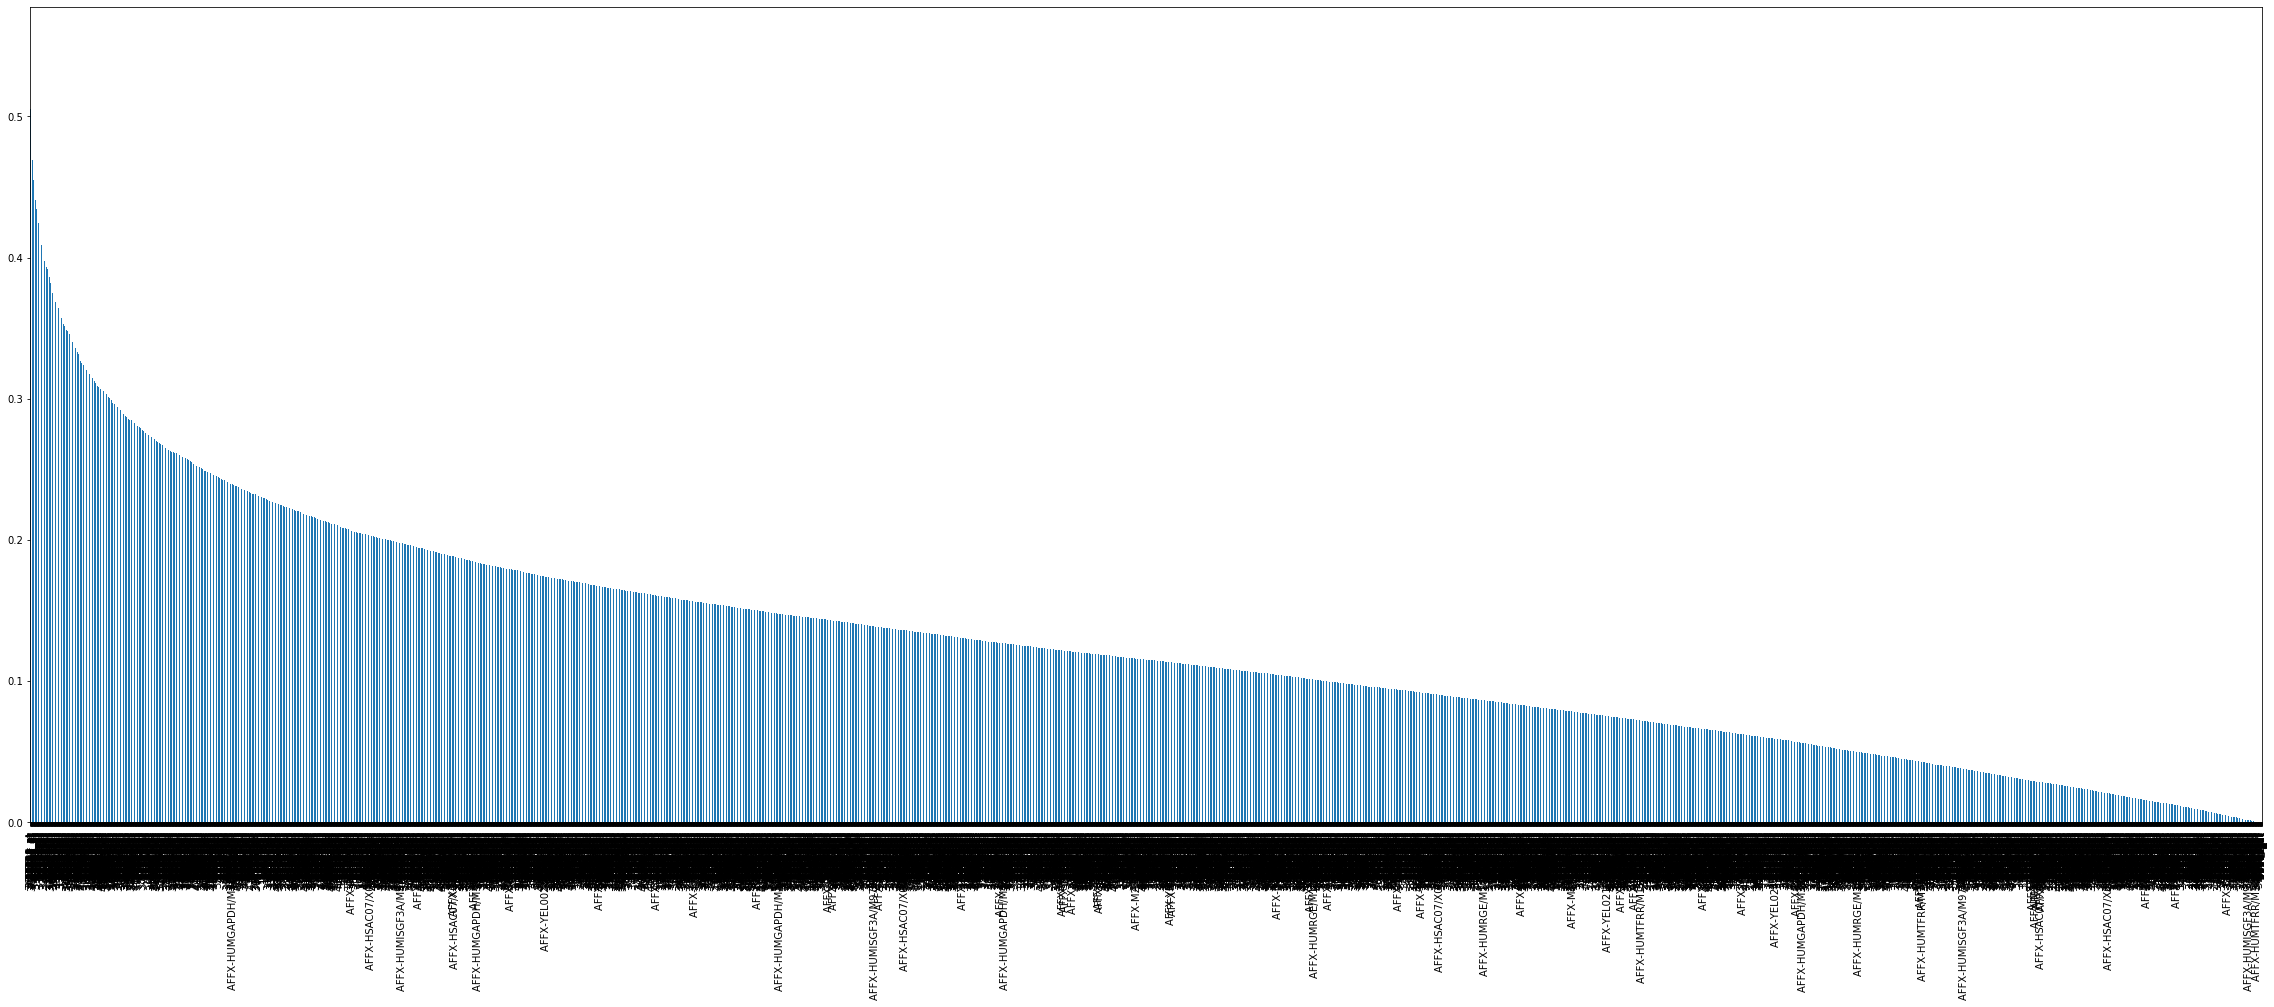

In [33]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=feature_name
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [34]:
required_indices = (-mutual_information).argsort()[:number_of_features_required]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  32378_at 
Selected Feature 2 is :  41483_s_at 
Selected Feature 3 is :  32235_at 
Selected Feature 4 is :  36596_r_at 
Selected Feature 5 is :  35566_f_at 
Selected Feature 6 is :  32808_at 
Selected Feature 7 is :  41276_at 
Selected Feature 8 is :  39070_at 
Selected Feature 9 is :  34792_at 
Selected Feature 10 is :  1069_at 
Selected Feature 11 is :  36659_at 
Selected Feature 12 is :  256_s_at 
Selected Feature 13 is :  34409_at 
Selected Feature 14 is :  35109_at 
Selected Feature 15 is :  35916_s_at 
Selected Feature 16 is :  33614_at 
Selected Feature 17 is :  35414_s_at 
Selected Feature 18 is :  36702_at 
Selected Feature 19 is :  1369_s_at 
Selected Feature 20 is :  33703_f_at 
Selected Feature 21 is :  2079_s_at 
Selected Feature 22 is :  36658_at 
Selected Feature 23 is :  1394_at 
Selected Feature 24 is :  32145_at 
Selected Feature 25 is :  1664_at 
Selected Feature 26 is :  40103_at 
Selected Feature 27 is :  40695_at 
Selected Feature 28 is :  

Selected Feature 786 is :  37846_at 
Selected Feature 787 is :  39910_at 
Selected Feature 788 is :  40997_at 
Selected Feature 789 is :  36170_at 
Selected Feature 790 is :  1965_s_at 
Selected Feature 791 is :  431_at 
Selected Feature 792 is :  32905_s_at 
Selected Feature 793 is :  36404_at 
Selected Feature 794 is :  721_g_at 
Selected Feature 795 is :  33710_at 
Selected Feature 796 is :  34080_at 
Selected Feature 797 is :  32324_at 
Selected Feature 798 is :  278_at 
Selected Feature 799 is :  33672_f_at 
Selected Feature 800 is :  34095_f_at 
Selected Feature 801 is :  36103_at 
Selected Feature 802 is :  34541_at 
Selected Feature 803 is :  36107_at 
Selected Feature 804 is :  36645_at 
Selected Feature 805 is :  607_s_at 
Selected Feature 806 is :  41658_at 
Selected Feature 807 is :  32983_at 
Selected Feature 808 is :  32395_r_at 
Selected Feature 809 is :  31362_at 
Selected Feature 810 is :  37809_at 
Selected Feature 811 is :  283_at 
Selected Feature 812 is :  40218_at

Selected Feature 1535 is :  35011_at 
Selected Feature 1536 is :  39326_at 
Selected Feature 1537 is :  38966_at 
Selected Feature 1538 is :  AFFX-HUMISGF3A/M97935_MA_at 
Selected Feature 1539 is :  41561_s_at 
Selected Feature 1540 is :  32288_r_at 
Selected Feature 1541 is :  1155_at 
Selected Feature 1542 is :  1029_s_at 
Selected Feature 1543 is :  38892_at 
Selected Feature 1544 is :  34009_at 
Selected Feature 1545 is :  41540_at 
Selected Feature 1546 is :  40720_at 
Selected Feature 1547 is :  2040_s_at 
Selected Feature 1548 is :  39948_at 
Selected Feature 1549 is :  31727_at 
Selected Feature 1550 is :  39080_at 
Selected Feature 1551 is :  41664_at 
Selected Feature 1552 is :  32893_s_at 
Selected Feature 1553 is :  40865_at 
Selected Feature 1554 is :  40672_at 
Selected Feature 1555 is :  31382_f_at 
Selected Feature 1556 is :  734_at 
Selected Feature 1557 is :  35297_at 
Selected Feature 1558 is :  41797_at 
Selected Feature 1559 is :  37347_at 
Selected Feature 1560 is

Selected Feature 2267 is :  37649_at 
Selected Feature 2268 is :  32352_at 
Selected Feature 2269 is :  37441_at 
Selected Feature 2270 is :  39256_at 
Selected Feature 2271 is :  926_at 
Selected Feature 2272 is :  618_at 
Selected Feature 2273 is :  41427_at 
Selected Feature 2274 is :  38505_at 
Selected Feature 2275 is :  40873_at 
Selected Feature 2276 is :  36591_at 
Selected Feature 2277 is :  38188_s_at 
Selected Feature 2278 is :  34799_at 
Selected Feature 2279 is :  37325_at 
Selected Feature 2280 is :  38952_s_at 
Selected Feature 2281 is :  31946_s_at 
Selected Feature 2282 is :  33785_at 
Selected Feature 2283 is :  35174_i_at 
Selected Feature 2284 is :  32676_at 
Selected Feature 2285 is :  32046_at 
Selected Feature 2286 is :  35874_at 
Selected Feature 2287 is :  39744_at 
Selected Feature 2288 is :  40494_at 
Selected Feature 2289 is :  32761_at 
Selected Feature 2290 is :  1552_i_at 
Selected Feature 2291 is :  37485_at 
Selected Feature 2292 is :  40454_at 
Selecte

In [35]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 2394
['32378_at ', '41483_s_at ', '32235_at ', '36596_r_at ', '35566_f_at ', '32808_at ', '41276_at ', '39070_at ', '34792_at ', '1069_at ', '36659_at ', '256_s_at ', '34409_at ', '35109_at ', '35916_s_at ', '33614_at ', '35414_s_at ', '36702_at ', '1369_s_at ', '33703_f_at ', '2079_s_at ', '36658_at ', '1394_at ', '32145_at ', '1664_at ', '40103_at ', '40695_at ', '41771_g_at ', '33131_at ', '41435_at ', '38675_at ', '38479_at ', '37020_at ', '36894_at ', '823_at ', 'AFFX-hum_alu_at ', '39370_at ', '36024_at ', '38051_at ', '36184_at ', '1235_at ', '37655_at ', '1367_f_at ', '40718_at ', '632_at ', '38229_at ', '35336_at ', '37923_at ', '319_g_at ', '40867_at ', '36616_at ', '37745_s_at ', '33308_at ', '34811_at ', '33754_at ', '32662_at ', '291_s_at ', '33545_at ', '38487_at ', '33383_f_at ', '41220_at ', '32590_at ', '38971_r_at ', '39350_at ', '31773_at ', '297_g_at ', '35412_at ', '36994_at ', '39389_at ', '36851_g_at ', '38729_at ', '33699_at ', '416

In [36]:
X_train2 = X_train[required_features_mi]
X_train2.head()

,32378_at,41483_s_at,32235_at,36596_r_at,35566_f_at,32808_at,41276_at,39070_at,34792_at,1069_at,...,AFFX-LysX-5_at,39366_at,39029_at,34054_at,33029_at,39442_at,40630_at,39208_i_at,38492_at,565_at
116,-0.890271,3.013027,0.046863,-0.632370,-0.572445,-0.528458,-0.685495,-0.323686,-1.065416,-0.074668,...,-1.292861,-0.989279,-0.090221,-1.823614,-1.935421,-1.103107,-1.660980,0.036965,-1.369443,-0.816728
55,0.050728,-0.423036,-0.546439,-0.270487,1.241250,0.626927,-1.078721,-0.275933,-0.271079,-0.246380,...,-1.222692,-1.196088,-0.819217,-1.794096,-1.327021,-0.756888,-0.618308,-0.391525,-0.992730,-0.926062
26,-1.153657,-0.298102,-0.852081,-0.211201,-0.105905,0.050207,-0.318702,0.921209,1.400690,0.103045,...,0.754950,0.658442,-0.758189,0.952507,1.173431,-0.119094,0.089948,0.066857,0.819123,1.412807
130,-0.349643,0.245575,-0.583619,-0.055180,2.347136,0.177503,-0.213364,-0.557911,0.054288,-0.130522,...,-0.959559,-0.574868,-1.040627,-2.062706,-1.002726,-0.475056,-0.958899,-0.167990,-0.575861,-1.061499
177,0.562408,-0.520316,-1.116548,0.587795,-0.630254,0.316407,-0.670912,1.919828,0.486168,-0.513426,...,-0.445474,-0.688792,-0.049091,0.084692,0.405469,-0.265235,-1.168858,-0.245638,-1.238454,-0.520737


In [37]:
X_test2 = X_test[required_features_mi]
X_test2.head()

,32378_at,41483_s_at,32235_at,36596_r_at,35566_f_at,32808_at,41276_at,39070_at,34792_at,1069_at,...,AFFX-LysX-5_at,39366_at,39029_at,34054_at,33029_at,39442_at,40630_at,39208_i_at,38492_at,565_at
18,1.758761,-0.983766,-1.309219,-0.392276,-0.769752,0.944306,-1.104242,0.941342,1.229329,-0.506921,...,-0.856255,-1.178622,-0.267896,1.021873,-0.737520,-0.377064,-0.890971,-0.337159,-0.814891,-0.795796
45,-0.593223,-0.657815,-0.052122,-0.111251,0.650826,-1.205232,0.147180,0.107184,0.283186,-0.169441,...,0.311522,-0.188243,0.579750,-1.015941,-0.180450,-0.301099,0.778966,-0.018412,0.674987,0.196339
33,-1.014415,1.863913,-0.487544,0.180359,0.771519,-0.420767,1.287926,-0.610828,0.048106,0.408168,...,1.373557,0.310718,-0.234444,0.912289,1.089473,-0.447946,0.675174,0.212744,1.189621,1.237971
37,-0.104482,-0.654241,-0.374269,0.121809,0.900614,0.342343,0.237934,-0.556529,-0.341811,0.060032,...,0.755194,0.810869,-0.293469,-0.268042,1.512448,-0.688831,0.613421,0.113065,1.543386,1.612761
109,-0.846112,-1.082212,-0.831450,0.054283,-0.264622,-1.102457,0.085071,0.442156,-0.926686,-0.153514,...,1.114809,0.118199,-0.829900,1.276092,0.568214,-0.485787,2.038010,0.193808,1.837872,1.091207


In [38]:
y_train2 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test2 = np.array([a+1 for a in y_test])

print(y_test2)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [39]:
temp_fscore=0
temp_cm = np.zeros([5,5])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train2, y_train2) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train2)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train2, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test2)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test2, y_test_prediction)))
    
    f_score_knn = f1_score(y_test2, y_test_prediction, average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test2, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test2, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test2, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test2, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test2, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 95.1220
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 97.5309
Testing accuracy on selected features for 2 neighbors: 85.3659
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 96.9136
Testing accuracy on selected features for 3 neighbors: 90.2439
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 95.0617
Testing accuracy on selected features for 4 neighbors: 82.9268
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 95.6790
Testing accuracy on selected features for 5 neighbors: 85.3659
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 93.8272
Testing accuracy on selected features for 6 neighbors: 85.3659
KNN Classfier for 7 neighbors:
Training accuracy on

In [40]:
cm = confusion_matrix(y_test2, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 1  3  0  0  0]
 [ 1  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  3]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 2.73684211  1.26315789  0.          0.          0.        ]
 [ 1.68421053  0.          0.05263158  0.          0.26315789]
 [ 1.          0.          0.          2.          0.        ]
 [ 0.47368421  0.          0.          0.          2.52631579]]


Confusion Matrix of KNN Classifier:


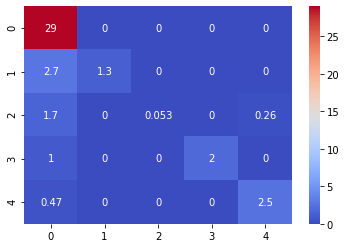

In [41]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [42]:
f_score_knn = f1_score(y_test2, max_y_test_prediction, average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9512195121951219
Average F-Score is : 0.8498074454428758


# SVM(Support Vector Machine)

In [43]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train2,y_train2)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train2)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train2, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test2)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test2, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 99.3827
Testing accuracy on selected features: 87.8049


In [44]:
cm_svc = confusion_matrix(y_test2, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[29  0  0  0  0]
 [ 2  2  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]


Confusion Matrix of SVM Classifier:


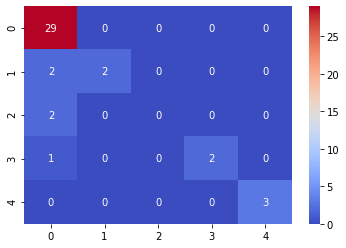

In [45]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [46]:
f_score_svc = f1_score(y_test2, y_test_prediction_svc, average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8780487804878049


# Feature Selection Using T-Test

In [47]:
start_time_t = time.time()
x= df.values.copy()               # It is converting df into numpy arrray


a,b = x.shape             # Here, a is taking row and b is taking columns 
n1 =0
n2 = 0
n3=0
n4 = 0
n5 = 0

for i in range(a):       
    if x[i][0] == 1:
        n1 = n1 + 1;
    elif x[i][0] ==2:
        n2 = n1 + 1;
    elif x[i][0] == 3:
        n3 = n1 + 1;
    elif x[i][0] ==4:
        n4 = n1 + 1;
    else:
        n5 = n1 + 1;

n = [n1,n2,n3,n4,n5]



tval=[]
sample1=[]
sample2=[]
sample3=[]
sample4=[]
sample5=[]

# It is calculating t value

for j in range(1,b):      
    for i in range(a):

        if x[i][0]== 1:          
            sample1.append(x[i][j])
        elif x[i][0]== 2:
            sample2.append(x[i][j])
        elif x[i][0]== 3:
            sample3.append(x[i][j])
        elif x[i][0]== 4:
            sample4.append(x[i][j])
        else :
            sample5.append(x[i][j])

# It is converting sample values from string to float
    sample1 = list(map(float,sample1))       
    sample2 = list(map(float,sample2))
    sample3 = list(map(float, sample3))
    sample4 = list(map(float, sample4))
    sample5 = list(map(float, sample5))

    sample = [sample1,sample2,sample3,sample4,sample5]



    sbar = [0,0,0,0,0]
    svar = [0,0,0,0,0]
    tset = []
    for p in range(5):
         sbar[p] =  statistics.mean(sample[p])         
            
    for q in range(5):
        svar[q] = statistics.variance(sample[q])     




    for m in range(4):

        for k in range(m+1,5):
          t = abs(sbar[m] - sbar[k])/np.sqrt(svar[m]/n[m]+svar[m]/n[k])  # It is calculating t value by comparing mean and variance using given formula
          tset.append(t)

    tavg = statistics.mean(tset)
    tval.append(tavg)       
    
    sample1.clear()    
    sample2.clear()
    sample3.clear()
    sample4.clear()
    sample5.clear()
    tset.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index = [p+1 for p in sort_index]    
new_index.reverse()  

required_features_t = new_index[:number_of_features_required]   #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :147.65798687934875 seconds


In [48]:
print(required_features_t)

[11, 141, 26, 28, 126, 104, 41, 184, 68, 198, 249, 105, 160, 85, 122, 203, 44, 165, 749, 537, 133, 69, 293, 42, 99, 317, 684, 452, 602, 986, 442, 398, 38, 376, 63, 945, 391, 641, 202, 898, 381, 1355, 117, 1138, 661, 60, 835, 755, 1240, 880, 1412, 368, 295, 270, 21, 78, 772, 474, 785, 1976, 633, 425, 143, 1149, 462, 1334, 1400, 304, 2053, 1624, 528, 936, 206, 756, 54, 64, 816, 176, 23, 1128, 876, 1094, 687, 800, 1503, 1988, 183, 83, 114, 1762, 1512, 297, 679, 1245, 1971, 955, 1634, 689, 185, 393, 810, 964, 2288, 1630, 778, 1168, 308, 1055, 22, 908, 1220, 1281, 1175, 558, 416, 2678, 1227, 1253, 779, 344, 1455, 2244, 2326, 402, 2572, 232, 1519, 708, 403, 1415, 1363, 1342, 1255, 582, 468, 2795, 899, 1875, 189, 836, 2081, 1037, 118, 357, 1047, 1464, 3097, 925, 716, 538, 644, 148, 1018, 81, 1532, 1513, 2565, 761, 1459, 1764, 1038, 698, 1714, 2430, 721, 664, 1401, 3284, 1898, 1531, 1009, 1028, 2878, 3045, 477, 1884, 1944, 1490, 2534, 2794, 1932, 4235, 830, 2154, 1145, 89, 3380, 4492, 1782, 19

In [49]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  2394


In [50]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['40808_at ', '36924_r_at ', '33377_at ', '32252_at ', '33426_at ', '33702_f_at ', '32648_at ', '33703_f_at ', '40544_g_at ', '40649_at ', '34265_at ', '273_g_at ', '272_at ', '39015_f_at ', '1390_s_at ', '40201_at ', '613_at ', '37478_at ', '38887_r_at ', '41430_at ', '35726_at ', '39052_at ', '36148_at ', '39016_r_at ', '38465_at ', '39352_at ', '40165_at ', '40995_at ', '41629_at ', '38484_at ', '39332_at ', '41424_at ', '39026_r_at ', '41209_at ', '2027_at ', '40272_at ', '32323_at ', '40543_at ', '35194_at ', '41289_at ', '38285_at ', '36160_s_at ', '37399_at ', '38886_i_at ', '40746_at ', '37897_s_at ', '33157_at ', '41792_at ', '35668_at ', '260_at ', '35245_at ', '36606_at ', '917_g_at ', '37482_at ', '32805_at ', '692_s_at ', '39990_at ', '916_at ', '37210_at ', '37182_at ', '39696_at ', '601_s_at ', '926_at ', '32771_at ', '32650_at ', '35742_at ', '36750_at ', '34842_at ', '37365_at ', '35592_at ', '37639_at ', '38957_at ', '40003_at ', '41069_at ', '3

In [51]:
X_train3 = X_train.iloc[:,required_features_t]

In [52]:
X_train3.head()

,41827_f_at,32378_at,34342_s_at,36780_at,256_s_at,273_g_at,39016_r_at,37015_at,39052_at,34643_at,...,1926_at,40319_at,36779_at,41363_at,33163_r_at,35581_at,31635_g_at,35207_at,31756_at,33492_at
116,0.043547,-0.890271,-0.715176,0.096222,-0.174389,-0.263389,-0.347653,0.036821,-0.303055,-0.399587,...,-1.314809,-0.740840,-0.914507,-1.259587,-0.915274,-1.656502,-0.608741,-0.587387,-1.174766,-1.276899
55,0.947941,0.050728,-0.659349,-0.561450,0.571216,-0.226946,-0.343221,-0.292945,-0.271067,-0.493643,...,0.289977,-0.808628,-0.842877,-0.953515,-0.542441,-1.009817,-0.714469,0.716730,-0.835216,-0.706837
26,0.017129,-1.153657,-0.820792,-0.527596,0.509466,-0.218961,-0.398096,-0.410524,-0.237925,1.026382,...,-0.628835,0.510816,0.248708,1.002502,-0.192952,0.534010,0.117048,0.636766,0.151220,-0.057408
130,1.222252,-0.349643,-0.946623,0.012800,-1.088589,-0.229107,-0.385797,-0.085178,-0.275812,1.017361,...,-1.332720,0.021692,-0.241466,0.267086,-0.396278,-0.338318,-0.291760,2.811412,-0.399895,0.704717
177,-0.900902,0.562408,-0.300878,-0.667477,-0.826689,-0.205808,3.117531,-0.346039,5.900794,-0.170868,...,-0.019661,0.527236,-0.876585,-0.672730,0.392940,-0.561117,-0.323418,-0.263474,-0.874104,0.357060


In [53]:
X_test3 = X_test.iloc[:,required_features_t]
X_test3.head()

,41827_f_at,32378_at,34342_s_at,36780_at,256_s_at,273_g_at,39016_r_at,37015_at,39052_at,34643_at,...,1926_at,40319_at,36779_at,41363_at,33163_r_at,35581_at,31635_g_at,35207_at,31756_at,33492_at
18,-0.888671,1.758761,-0.231508,-0.753213,0.878556,-0.249209,-0.337232,-0.406919,-0.261029,-0.371614,...,-0.096891,-0.697607,-0.796247,-0.203875,2.424465,-1.004647,-0.400837,-0.682884,-0.672841,-1.034018
45,0.670784,-0.593223,-0.067670,-0.602601,-0.084805,-0.215546,-0.379873,-0.407108,-0.228630,-0.192379,...,-0.677408,0.006779,0.524133,0.692742,-0.048108,0.422352,0.357828,-0.048048,0.093468,0.214320
33,0.221868,-1.014415,0.108363,-0.398497,0.463863,-0.203708,-0.320661,-0.259933,-0.237107,-0.764848,...,-0.808585,1.217462,0.613319,0.655339,-0.075741,2.014771,0.764708,-0.447804,0.543009,0.577074
37,0.659959,-0.104482,1.098062,-0.806616,-0.135736,-0.169653,-0.320360,-0.393710,-0.195082,-0.854011,...,1.315751,0.741444,0.213877,0.783352,0.028026,1.205250,0.311559,-0.222076,0.448109,0.950738
109,0.635420,-0.846112,2.634064,-0.972445,1.745366,-0.173188,-0.371469,-0.434231,-0.209927,-1.048977,...,-0.122252,0.090986,0.238315,1.269591,0.002125,1.233165,0.068648,-0.860308,0.642552,0.350782


In [54]:
X_test3.shape

(41, 2394)

In [55]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [56]:
temp_fscore=0
temp_cm = np.zeros([5,5])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction, average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 97.5610
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 97.5309
Testing accuracy on selected features for 2 neighbors: 90.2439
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 96.9136
Testing accuracy on selected features for 3 neighbors: 95.1220
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 95.0617
Testing accuracy on selected features for 4 neighbors: 90.2439
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 95.6790
Testing accuracy on selected features for 5 neighbors: 87.8049
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 94.4444
Testing accuracy on selected features for 6 neighbors: 85.3659
KNN Classfier for 7 neighbors:
Training accuracy on

In [57]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 1  3  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  3]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 2.31578947  1.68421053  0.          0.          0.        ]
 [ 1.73684211  0.          0.26315789  0.          0.        ]
 [ 1.42105263  0.          0.          1.57894737  0.        ]
 [ 0.          0.          0.          0.          3.        ]]


Confusion Matrix of KNN Classifier:


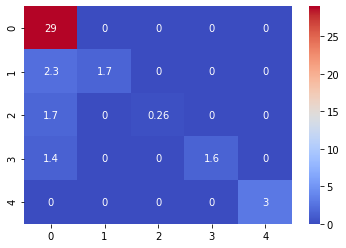

In [58]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [59]:
f_score_knn = f1_score(y_test3, max_y_test_prediction, average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.975609756097561
Average F-Score is : 0.8664955070603338


# SVM(Support Vector Machine)

In [60]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.7654
Testing accuracy on selected features: 87.8049


In [61]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[29  0  0  0  0]
 [ 2  2  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]


Confusion Matrix of SVM Classifier:


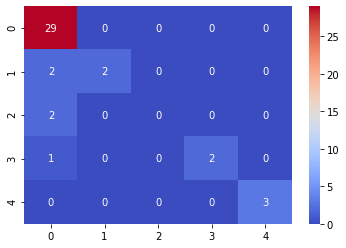

In [62]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [63]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc, average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8780487804878049


# (b) Classification of N/3 features using F = { f1 U f2 U f3)

In [79]:
columns = feature_set.shape[1]

number_of_features_required = columns/3
number_of_features_required_1 = 0.19*columns

print('number_of_features_required : '+str(number_of_features_required))
print('number_of_features_required_1 : '+str(number_of_features_required_1))

number_of_features_required = int(number_of_features_required)
number_of_features_required_1 = int(number_of_features_required_1)

print('number_of_features_required in integers: '+str(number_of_features_required))
print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))

number_of_features_required : 4200.0
number_of_features_required_1 : 2394.0
number_of_features_required in integers: 4200
number_of_features_required_1 in integers: 2394


In [80]:
selected_features_fc = selected_features_fc[:number_of_features_required]
required_features_mi = required_features_mi[:number_of_features_required]
selected_features_tt = selected_features_tt[:number_of_features_required]
f1 = set(selected_features_fc)
f2 = set(required_features_mi)
new_set = f1.union(f2,selected_features_tt)
new_list = list(new_set)
print('Length of new_list :',len(new_list))

Length of new_list : 6952


In [81]:
print('new list :',new_list)

new list : ['34400_at ', '35402_at ', '40366_at ', '39157_at ', '38337_at ', '32614_at ', '36445_at ', '36955_at ', '40457_at ', '33631_at ', '38220_at ', '39613_at ', '32158_at ', '38881_i_at ', '35082_at ', '37481_at ', '1998_i_at ', '607_s_at ', '34940_at ', '34581_s_at ', '32655_s_at ', '40111_g_at ', '1916_s_at ', '32883_at ', '36039_s_at ', '1948_f_at ', '1546_at ', '33062_at ', '40114_at ', '38130_s_at ', '935_at ', '39673_i_at ', '38462_at ', '37756_at ', '1171_s_at ', '39566_at ', 'AFFX-BioDn-5_at ', '38376_at ', '37785_at ', '36808_at ', '36178_at ', '35771_at ', '38433_at ', '35008_at ', '857_at ', '35193_at ', '33724_at ', '34732_at ', '36256_at ', '39952_at ', '39736_at ', '33520_at ', '37567_at ', '789_at ', '34446_at ', '35058_at ', '39998_at ', '33254_at ', '34924_at ', '33549_at ', '38465_at ', '33407_at ', '35390_at ', '35895_at ', '36657_at ', '31856_at ', '35810_at ', '39015_f_at ', '34419_at ', '37660_at ', '37710_at ', '40482_s_at ', '38952_s_at ', '38143_at ', '3

In [82]:
required_features = new_list[:number_of_features_required_1]
print('Length of required features : '+str(len(required_features)))

Length of required features : 2394


In [83]:
X_train4 = X_train[required_features]
X_train4.head()

,34400_at,35402_at,40366_at,39157_at,38337_at,32614_at,36445_at,36955_at,40457_at,33631_at,...,40799_at,41316_s_at,290_s_at,32338_at,32059_at,35809_g_at,37153_at,288_s_at,38019_at,1481_at
116,-0.238732,-1.158359,0.625163,-1.006314,-1.242943,-0.474181,-0.454258,-1.753801,-1.150795,-0.878043,...,-1.593512,-0.806418,-0.871679,-1.434740,-1.850508,-0.004701,-0.335820,-1.076038,-0.243093,-0.659956
55,-1.412310,-0.246146,-1.287720,-1.471160,-0.989136,-0.486698,-0.422749,-0.998015,-1.598717,-0.667279,...,-1.397977,-0.714251,-0.461232,-1.225413,-0.611744,-0.363033,-0.089135,-0.459297,0.116371,-0.283072
26,-0.981327,1.882149,0.937628,-0.289022,0.951169,-0.012364,-0.014824,0.038754,0.219244,1.823949,...,1.116200,-0.405827,1.048885,0.339567,0.728326,-1.079805,-0.083262,-0.459586,0.019970,-0.491527
130,0.724669,-0.311606,0.414031,-0.640671,0.406624,-0.450663,0.058322,-2.375937,-0.580434,-0.432696,...,-0.174546,-0.028001,-0.890705,0.183691,0.067477,0.496693,0.664893,1.099709,-0.101995,1.104309
177,0.132334,-0.974374,-0.534887,-0.152161,-0.688622,-0.441686,-0.621367,-0.120576,-0.101903,-0.946728,...,-0.467315,-0.169582,-0.887689,0.063365,-0.656360,-1.711395,2.773862,1.283382,0.259681,-0.364445


In [84]:
X_test4 = X_test[required_features]
X_test4.head()

,34400_at,35402_at,40366_at,39157_at,38337_at,32614_at,36445_at,36955_at,40457_at,33631_at,...,40799_at,41316_s_at,290_s_at,32338_at,32059_at,35809_g_at,37153_at,288_s_at,38019_at,1481_at
18,0.004914,-0.462180,-1.405042,-0.825199,-0.789457,-0.430560,-0.836583,-0.078025,-0.729401,-0.035817,...,-0.713871,-1.261836,0.124276,-1.035229,-1.111974,-0.718158,0.063371,-0.298944,-0.966692,3.915029
45,-0.905548,0.693884,-0.283786,-1.786633,0.134894,-0.290466,0.212208,-0.507185,-0.022317,-0.306542,...,0.739821,0.003785,-0.194174,0.260510,-0.164792,-0.495332,-0.533593,-0.343851,-0.548273,-0.119189
33,-1.036860,0.746948,0.527356,-0.526450,0.657535,-0.123946,0.359906,0.718999,1.722435,-0.081515,...,1.482695,0.625213,-0.298584,0.942936,0.364570,0.308011,-0.818049,2.209265,0.877498,0.530663
37,-0.702408,3.424627,1.229404,-0.348749,0.489175,-0.130900,0.376785,-0.112703,0.697521,-0.162109,...,1.307996,0.005312,0.426717,0.766425,0.975554,-1.079912,0.487677,-0.653763,-0.133869,0.340058
109,-0.670207,-0.328236,1.740541,0.699488,0.816481,0.143850,1.935906,-0.187869,1.055144,-0.067390,...,1.022172,1.061893,0.539016,0.927522,0.693157,-0.542021,-0.876784,-0.130112,-0.297091,5.527434


In [85]:
y_train4 = np.array([a+1 for a in y_train]) 
print(y_train4)

y_test4 = np.array([a+1 for a in y_test])

print(y_test4)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [86]:
temp_fscore=0
temp_cm = np.zeros([5,5])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train4, y_train4) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train4)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train4, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test4)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test4, y_test_prediction)))
    
    f_score_knn = f1_score(y_test4, y_test_prediction, average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test4, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test4, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test4, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test4, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test4, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 85.3659
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 93.2099
Testing accuracy on selected features for 2 neighbors: 82.9268
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 94.4444
Testing accuracy on selected features for 3 neighbors: 82.9268
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 91.9753
Testing accuracy on selected features for 4 neighbors: 82.9268
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 93.2099
Testing accuracy on selected features for 5 neighbors: 85.3659
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 90.7407
Testing accuracy on selected features for 6 neighbors: 85.3659
KNN Classfier for 7 neighbors:
Training accuracy on

In [87]:
cm = confusion_matrix(y_test4, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 2  2  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 1  0  0  0  2]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 2.94736842  1.05263158  0.          0.          0.        ]
 [ 1.84210526  0.          0.          0.          0.15789474]
 [ 1.31578947  0.          0.          1.68421053  0.        ]
 [ 0.68421053  0.          0.          0.          2.31578947]]


Confusion Matrix of KNN Classifier:


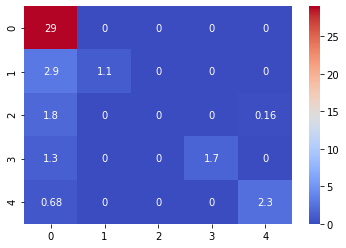

In [88]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [89]:
f_score_knn = f1_score(y_test4, max_y_test_prediction, average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.8536585365853658
Average F-Score is : 0.8305519897304237


# SVM(Support Vector Machine)

In [90]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train4,y_train4)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train4)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train4, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test4)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test4, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.7654
Testing accuracy on selected features: 85.3659


In [91]:
cm_svc = confusion_matrix(y_test4, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[29  0  0  0  0]
 [ 3  1  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]


Confusion Matrix of SVM Classifier:


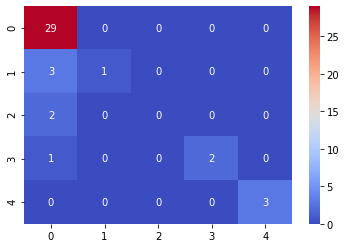

In [92]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [93]:
f_score_svc = f1_score(y_test4, y_test_prediction_svc, average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8536585365853658
